<h1>
    <font 
          style="font-size:40px;"
          color=#3367d6
          ><u>Indian Trending YouTube Video Insights</u>
    </font>
</h1>

<h2>
    <font 
          style="font-size:30px;"
          color=#3367d6
          >Introduction
    </font>
</h2>

<p>
    <font 
          style="font-size:12;"
          >YouTube is the most popular and most used video platfrom in the world today. YouTube has a list of <b>trending videos</b> that is updated constantly. Here we will use <b>Python</b> with some packages like <b>Pandas</b> and <b>Matplotlib</b> to analyze a dataset that was collected over 205 days. For each of those days, the dataset contains data about the trending videos of that day. It contains data about more than <b>40,000 trending videos</b>. We will analyze this data to get insights into YouTube trending videos, to see what is common between these videos. Those insights might also be used by people who want to increase popularity of their videos on YouTube.<br><br>The dataset that we will use is obtained from Kaggle <a href="https://www.kaggle.com/datasets/datasnaek/youtube-new?datasetId=4549&sortBy=voteCount">here</a>. It contains data about trending videos for many countries. Here we will analyze Indian trending videos.<br><br>
        <b>Note:</B> This analysis is inspired and adapted for Indian dataset, from the <a href="https://ammar-alyousfi.com/2020/youtube-trending-videos-analysis-2019-us?src=kgl">analysis</a> performed by Ammar Alyousfi
    </font>
</p>

<h2>
    <font 
          style="font-size:30px;"
          color=#3367d6
          >Goals of the analysis
    </font>
</h2>

<p>
    <font 
          style="font-size:12;"
          >We want to answer questions like:<br>
                <ul>
                    <li>How many views do our trending videos have? Do most of them have a large number of views? Is having a large number of views required for a video to become trending?</li>
                    <li>The same questions above, but applied to likes and comment count instead of views.</li>
                    <li>Which video remained the most on the trendin-videos list?</li>
                    <li>How many trending videos contain a fully-capitalized word in their titles?</li>
                    <li>What are the lengths of trending video titles? Is this length related to the video becoming trendy</li>
                    <li>How are views, likes, dislikes, comment count, title length, and other attributes correlate with (relate to) each other? How are they connected?</li>
                    <li>What are the most common words in trending video titles?</li>
                    <li>Which YouTube channels have the largest number of trending videos?</li>
                    <li>Which video category (e.g. Entertainment, Gaming, Comedy, etc.) has the largest number of trending videos?</li>
                    <li>When were trending videos published? On which days of the week? at which times of the day?</li>
    </font>
</p>

<h2>
    <font 
          style="font-size:30px;"
          color=#3367d6
          >Analysis
    </font>
</h2>

<h3>
    <font 
          style="font-size:20px;"
          color=#3367d6
          >Environment Setup
    </font>
</h3>

<p>
    <font 
          style="font-size:12;"
          >To setup the environment for data analysis, we import some Python packages that will help us analyzing the data, especially pandas for data analysis and matplotlib for visualization
    </font>
</p>

In [255]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

from collections import Counter
import datetime
import wordcloud
import json

In [256]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
#%matplotlib notebook

<h3>
    <font 
          style="font-size:20px;"
          color=#3367d6
          >Import Dataset
    </font>
</h3>

<p>
    <font 
          style="font-size:12;"
          >Let's read the dataset file which is in csv format
    </font>
</p>

In [257]:
df= pd.read_csv("E:\Case Study\YouTube Trending Video\DataSet\INvideos.csv")

<p>
    <font 
          style="font-size:12;"
          >We set some configuration options just for improving visualization graphs; nothing crucial
    </font>
</p>

In [258]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

<h3>
    <font 
          style="font-size:20px;"
          color=#3367d6
          >Getting a feel of the Dataset
    </font>
</h3>

<p>
    <font 
          style="font-size:12;"
          >Let's get a feel of our dataset by displaying its first few rows
    </font>
</p>

In [259]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


<p>
    <font 
          style="font-size:12;"
          ><br><br>Now, let's see some information about our dataset
    </font>
</p>

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

<p>
    <font 
          style="font-size:12;"
          >We can see that there are 37,352 entries in the dataset. We can see also that all columns in the dataset are complete (i.e. they have 40,949 non-null entries) except description column which has some null values; it only has 36,791 non-null values.
    </font>
</p>

<h3>
    <font 
          style="font-size:20px;"
          color=#3367d6
          >Data Cleaning
    </font>
</h3>

<p>
    <font 
          style="font-size:12;"
          >The description column has some null values. These are some of the rows whose description values are null. We can see that null values are denoted by NaN
    </font>
</p>

In [261]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
24,znOC3IU0dF8,17.14.11,Hero Tarun at #ChaySamWeddingReception | Saman...,News Mantra,24,2017-11-13T06:03:49.000Z,Hero Tarun At Samantha Naga Chaitanya Wedding ...,55178,45,94,15,https://i.ytimg.com/vi/znOC3IU0dF8/default.jpg,False,False,False,NaN
25,z3V9LUA6VQM,17.14.11,ఆమె బ్యాంకు అకౌంట్ లో పొరపాటున 125 కోట్లు జమయా...,OmFut,24,2017-11-12T09:45:58.000Z,[none],236710,858,197,66,https://i.ytimg.com/vi/z3V9LUA6VQM/default.jpg,False,False,False,NaN
36,qP67alYxSiU,17.14.11,కెమెరాలో రికార్డ్ అయిన ఈ అద్భుతాన్ని చూస్తే ఆశ...,HOTNEWS TELUGU,26,2017-11-12T03:53:49.000Z,"Miracles Caught on Camera|""Miracles Caught on ...",128851,0,0,0,https://i.ytimg.com/vi/qP67alYxSiU/default.jpg,True,True,False,NaN


<p>
    <font 
          style="font-size:12;"
          >So to do some sort of data cleaning, and to get rid of those null values, we put an empty string in place of each null value in the description column
    </font>
</p>

In [262]:
df["description"] = df["description"].fillna(value="")

<h3>
    <font 
          style="font-size:20px;"
          color=#3367d6
          >Dataset Collection Years
    </font>
</h3>

<p>
    <font 
          style="font-size:12;"
          >Let's see in which years the dataset was collected
    </font>
</p>

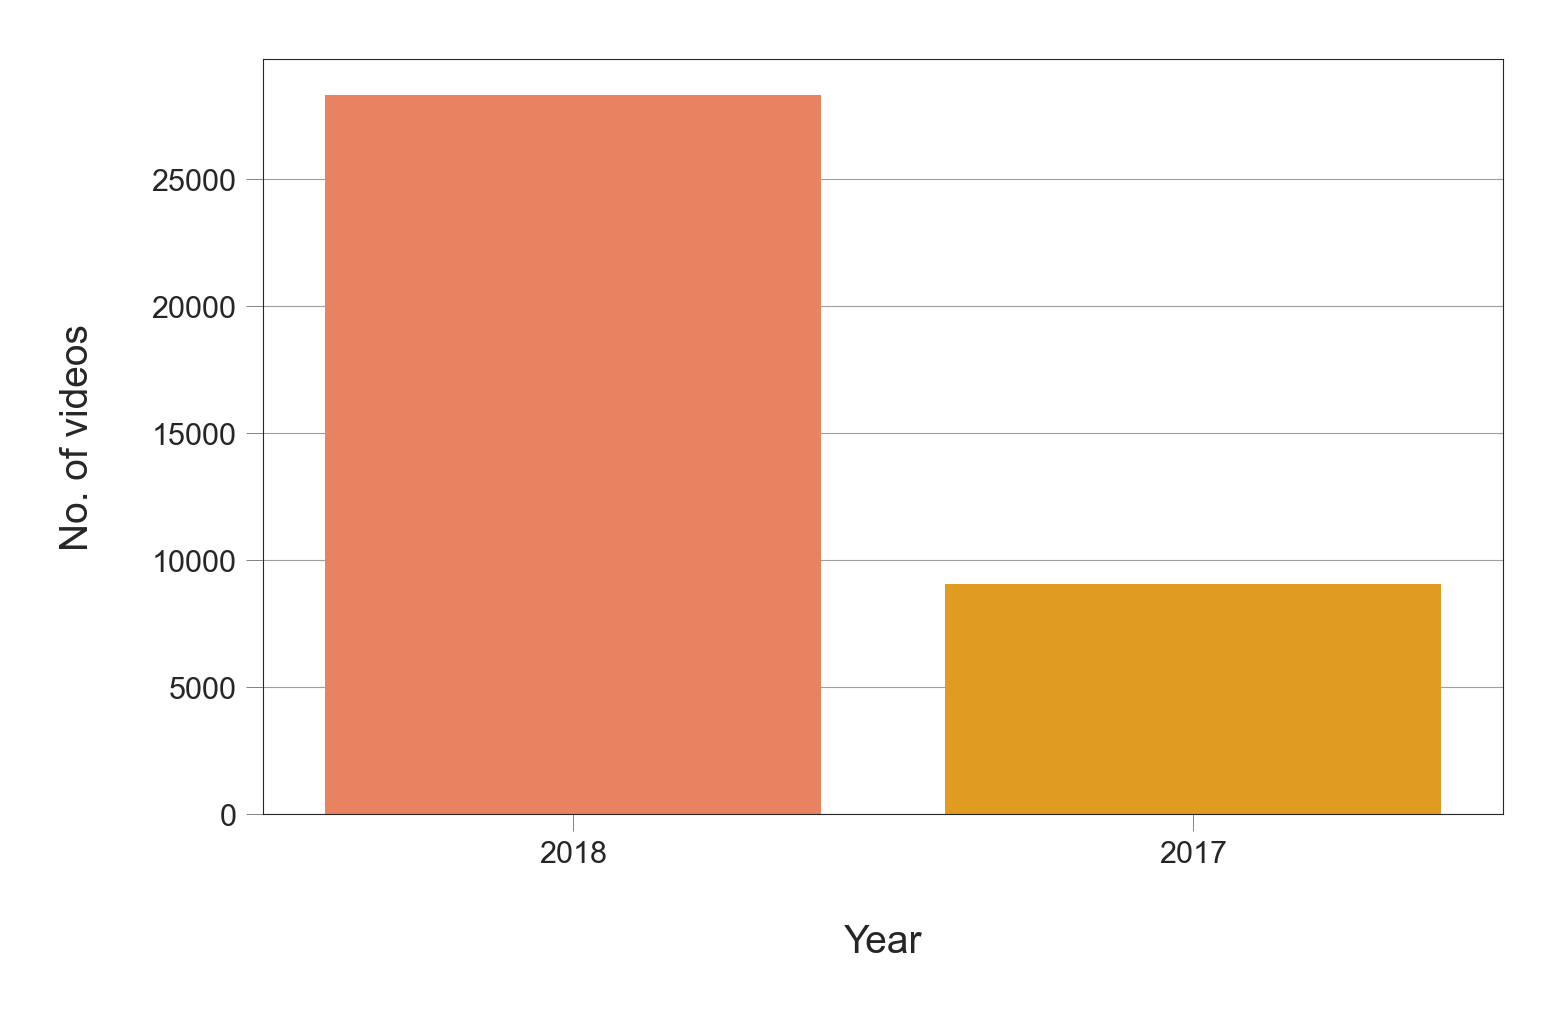

In [263]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [264]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018   0.76
2017   0.24
Name: trending_date, dtype: float64

<p>
    <font 
          style="font-size:12;"
          >We can see that the dataset was collected in 2017 and 2018 with 76% of it in 2018 and 24% in 2017.
    </font>
</p>

<h3>
    <font 
          style="font-size:20px;"
          color=#3367d6
          >Describtion of Numerical Columns
    </font>
</h3>

<p>
    <font 
          style="font-size:12;"
          >Now, let's see some statistical information about the numerical columns of our dataset
    </font>
</p>

In [265]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.00,37352.00,37352.00,37352.00,37352.00
mean,21.58,1060477.65,27082.72,1665.08,2677.00
std,6.56,3184932.05,97145.10,16076.17,14868.32
min,1.00,4024.00,0.00,0.00,0.00
25%,23.00,123915.50,864.00,108.00,81.00
50%,24.00,304586.00,3069.00,326.00,329.00
75%,24.00,799291.25,13774.25,1019.25,1285.00
max,43.00,125432237.00,2912710.00,1545017.00,827755.00


<p>
    <font 
          style="font-size:12;"
          >We note from the table above that:<br>
                <ul>
                    <li>The average number of views of a trending video is 1,060,477. The median value for the number of views is 304,586, which means that half the trending videos have views that are less than that number, and the other half have views larger than that number</li>
                    <li>The average number of likes of a trending video is 27,082, while the average number of dislikes is 1,665</li>
                    <li>TheAverage comment count is 2,677 while the median is 329</li>
    </font>
</p>
<p>
    <font 
          style="font-size:12;"
          >How useful are the observations above? Do they really represent the data? Let's examine more.
    </font>
</p>   

<h3>
    <font 
          style="font-size:20px;"
          color=#3367d6
          >Views Histogram
    </font>
</h3>

<p>
    <font 
          style="font-size:12;"
          >let's plot a histogram for the views column to take a look at its distribution: to see how many videos have between 10 million and 20 million views, how many videos have between 20 million and 30 million views, and so on.
    </font>
</p>

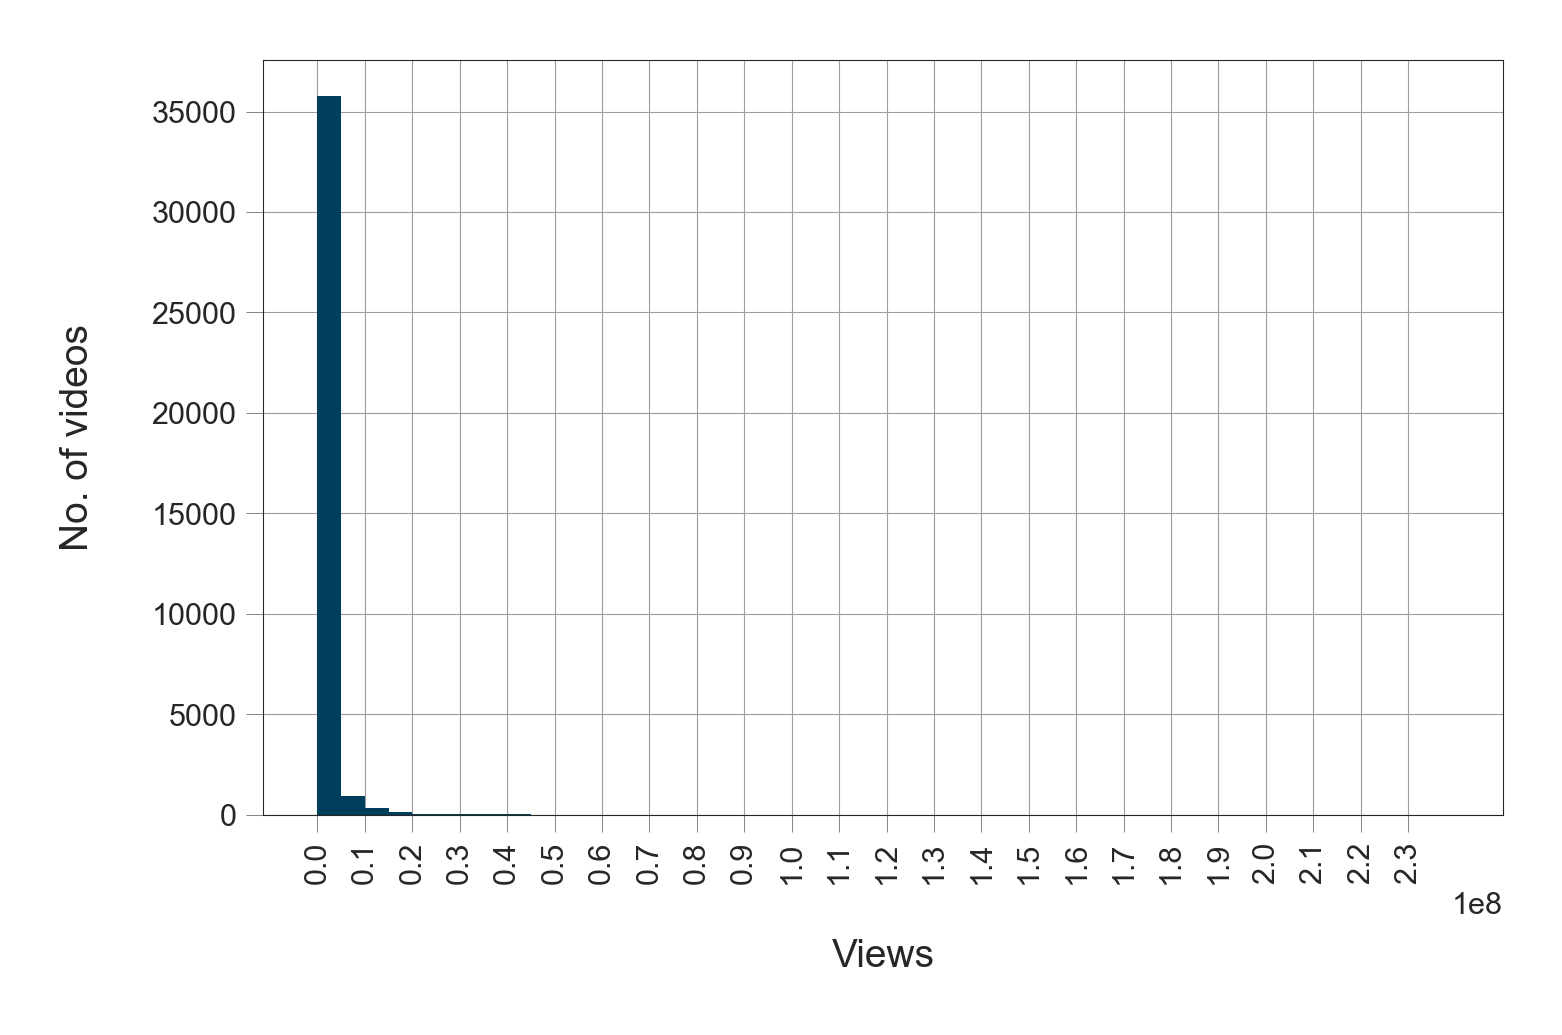

In [266]:
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

<p>
    <font 
          style="font-size:12;"
          >We note that the vast majority of trending videos have 5 million views or less.<br>
Now let us plot the histogram just for videos with 25 million views or less to get a closer look at the distribution of the data
</p>

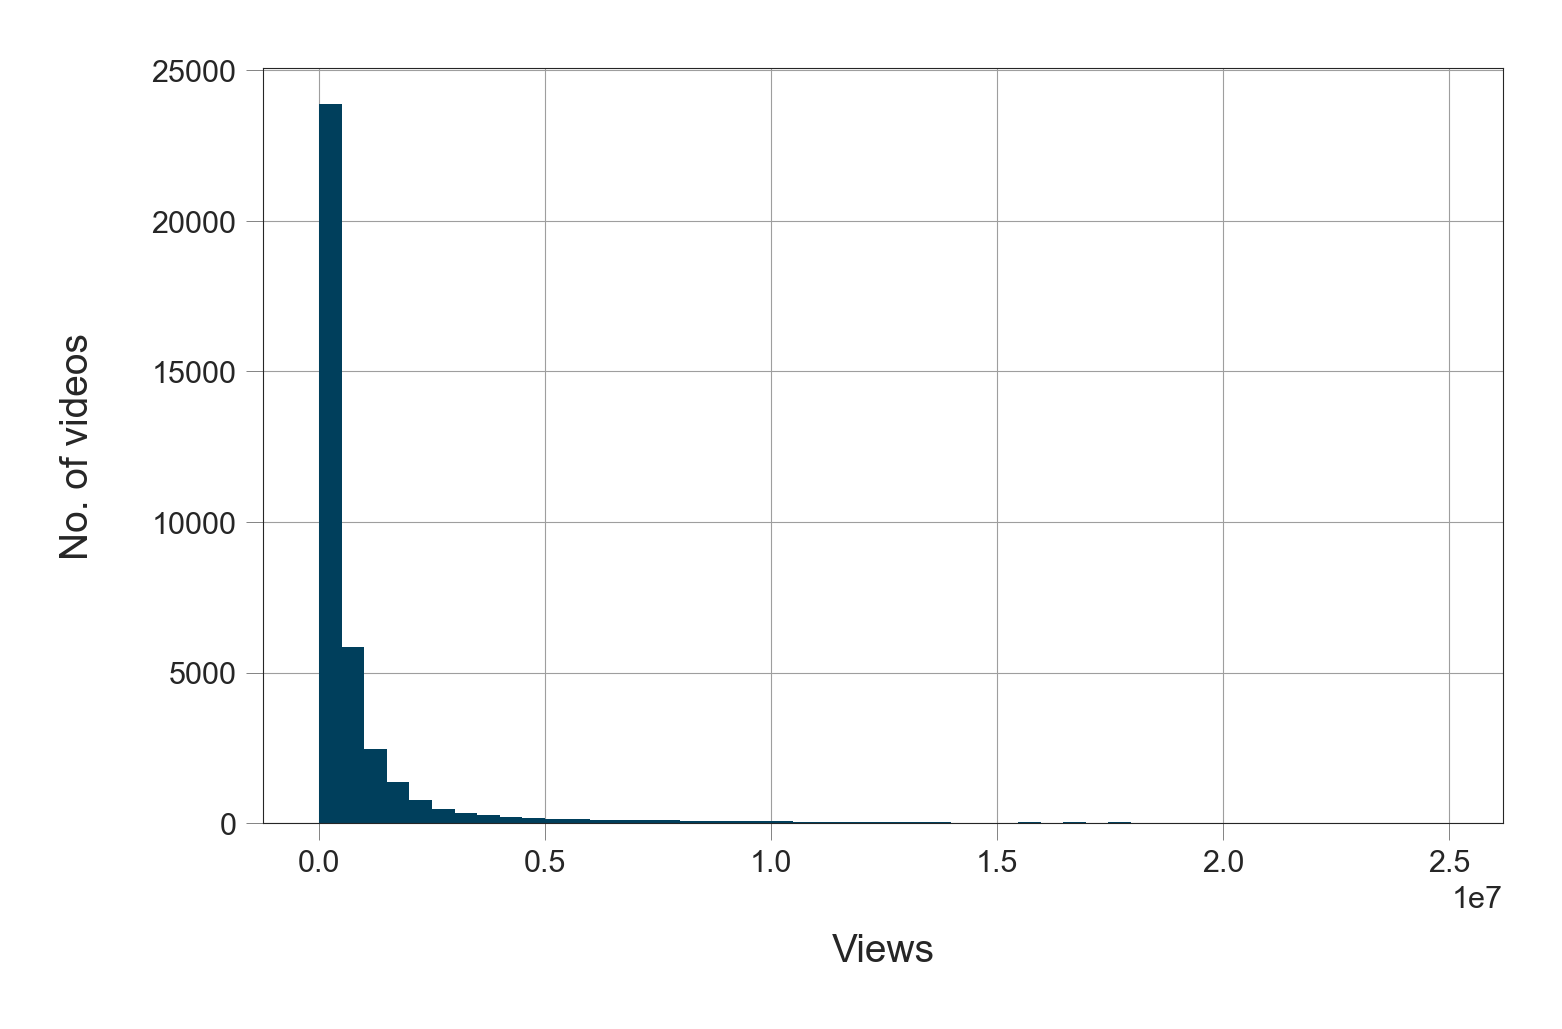

In [267]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["views"] < 25e6]["views"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

<p>
    <font 
          style="font-size:12;"
          >Now we see that the majority of trending videos have 1 million views or less. Let's see the exact percentage of videos less than 1 million views
</p>

In [268]:
df[df['views'] < 1e6]['views'].count() / df['views'].count() * 100

79.56735917755408

<p>
    <font 
          style="font-size:12;"
          >So, it is around 80%. Similarly, we can see that the percentage of videos with less than 1.5 million views is around 71%, and that the percentage of videos with less than 5 million views is around 91%.
</p>

<h3>
    <font 
          style="font-size:20px;"
          color=#3367d6
          >Likes Histogram
    </font>
</h3>

<p>
    <font 
          style="font-size:12;"
          >After views, we plot the histogram for likes column
    </font>
</p>

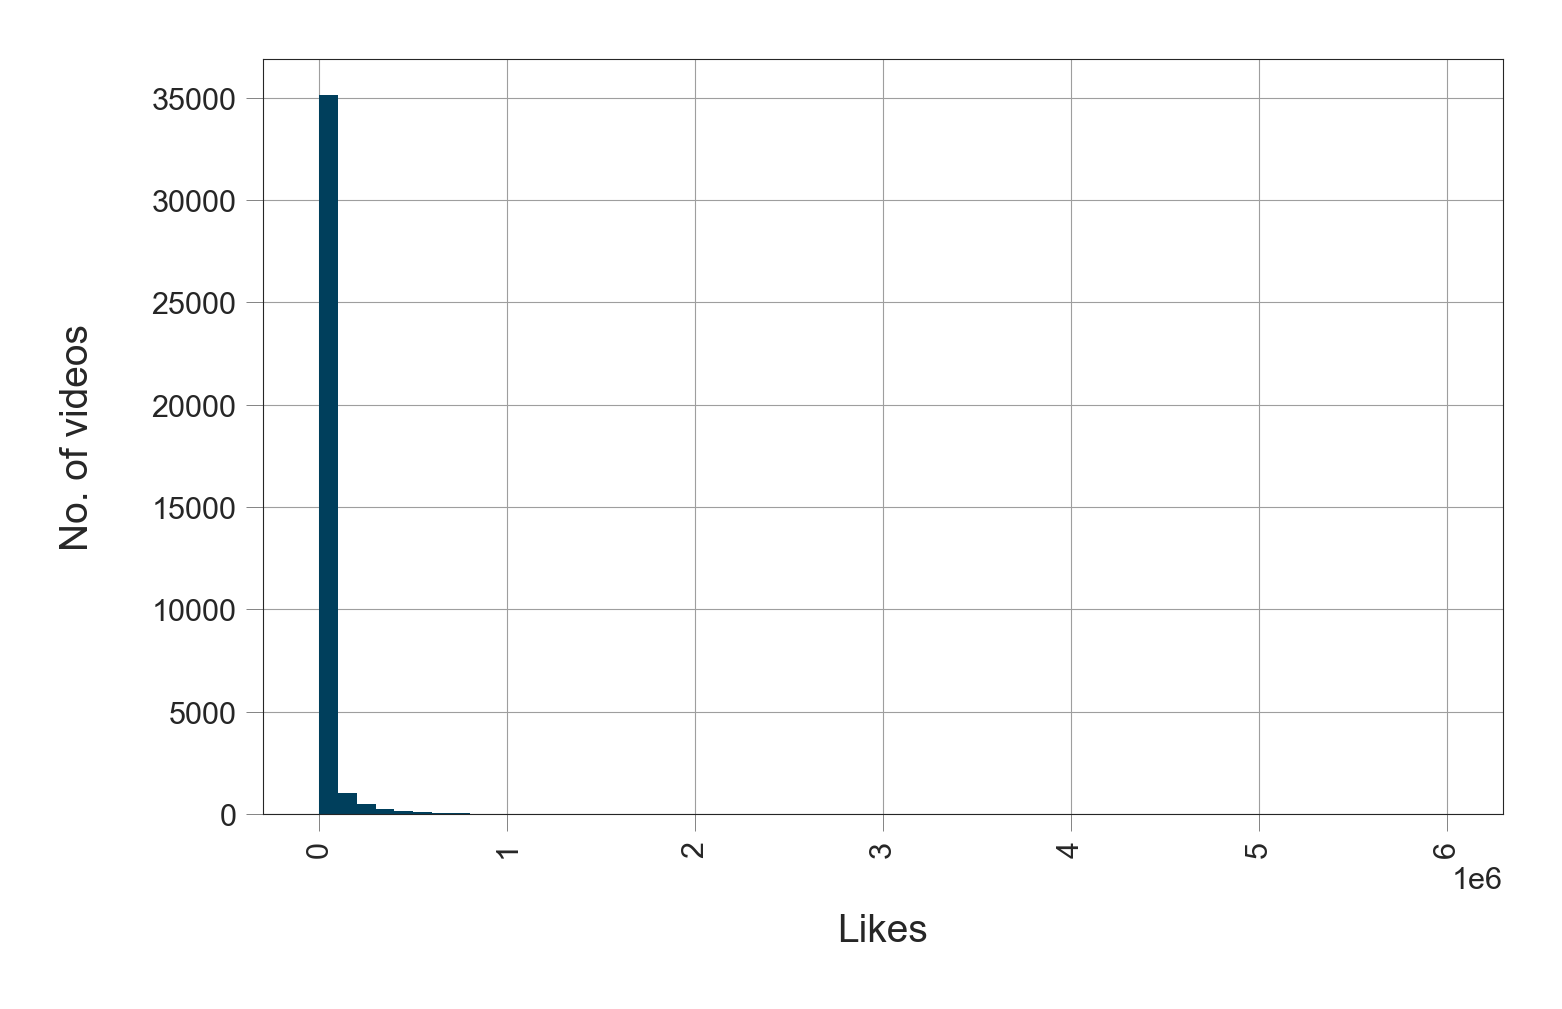

In [269]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

<p>
    <font 
          style="font-size:12;"
          >We note that the vast majority of trending videos have between 0 and 100,000 likes. Let us plot the histogram just for videos with 1000,000 likes or less to get a closer look at the distribution of the data
</p>

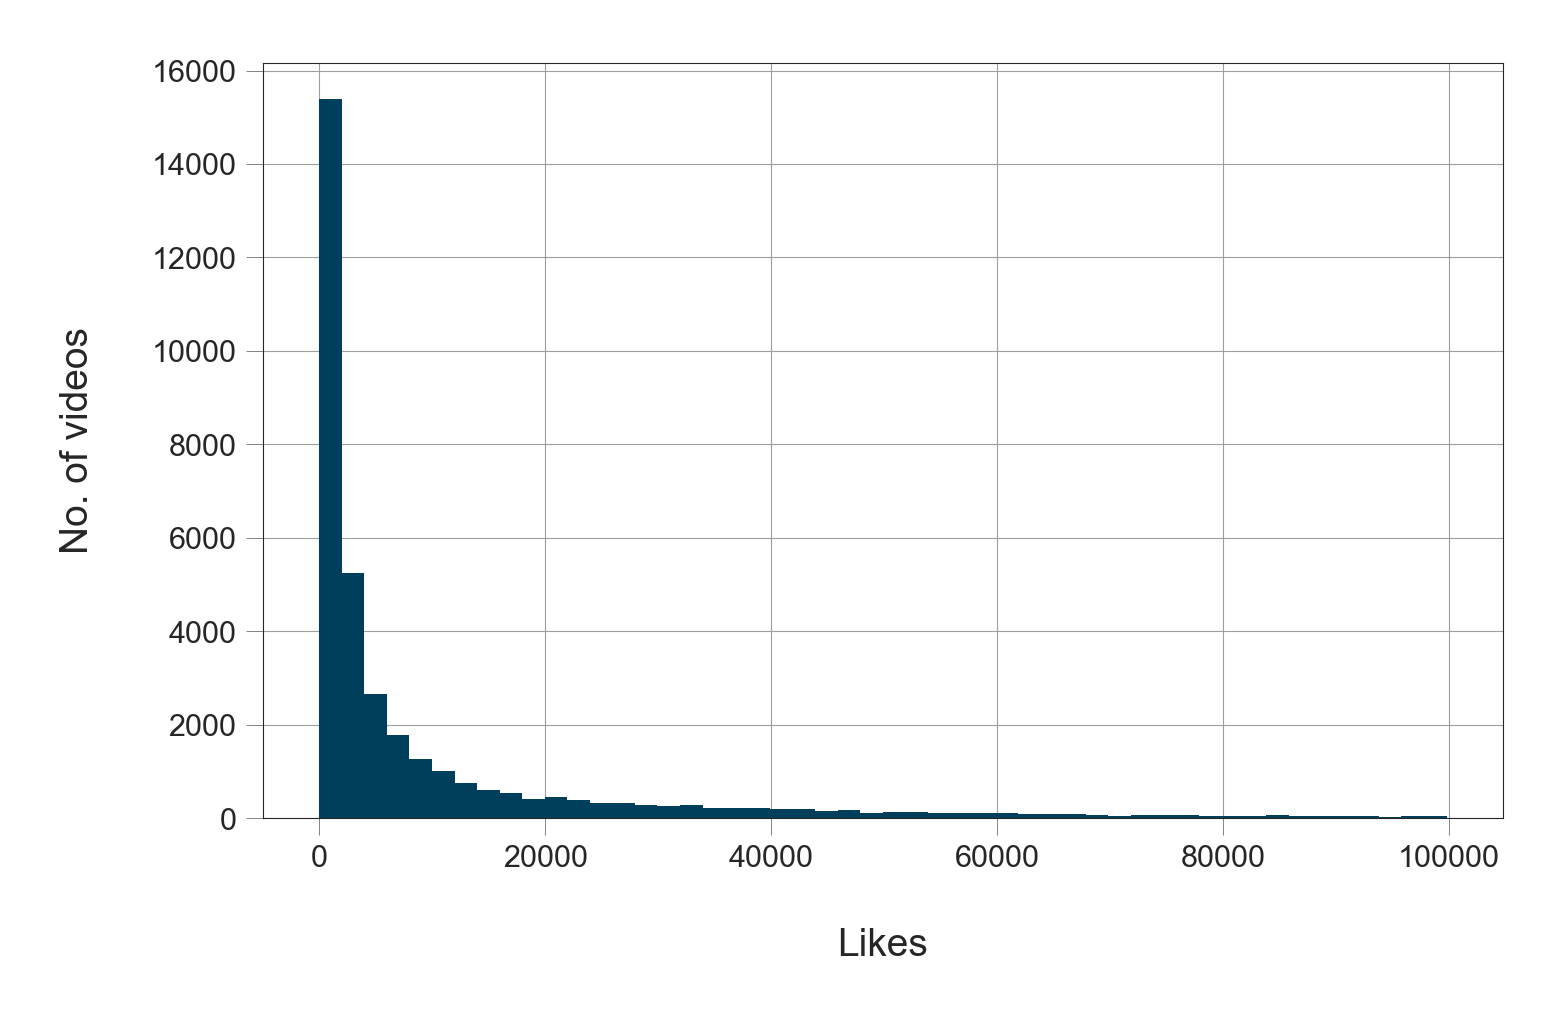

In [270]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

<p>
    <font 
          style="font-size:12;"
          >Now we can see that the majority of trending videos have 40000 likes or less with a peak for videos with 2000 likes or less.<br>
        Let's see the exact percentage of videos with less than 40000 likes
</p>

In [271]:
df[df['likes'] < 4e4]['likes'].count() / df['likes'].count() * 100

87.18676376097666

<p>
    <font 
          style="font-size:12;"
          >Similarly, we can see that the percentage of videos with less than 100,000 likes is around 84%
</p>

<h3>
    <font 
          style="font-size:20px;"
          color=#3367d6
          >Comment Count Histogram
    </font>
</h3>

<p>
    <font 
          style="font-size:12;"
          >Similar to above, we plot the histogram for comment column
    </font>
</p>

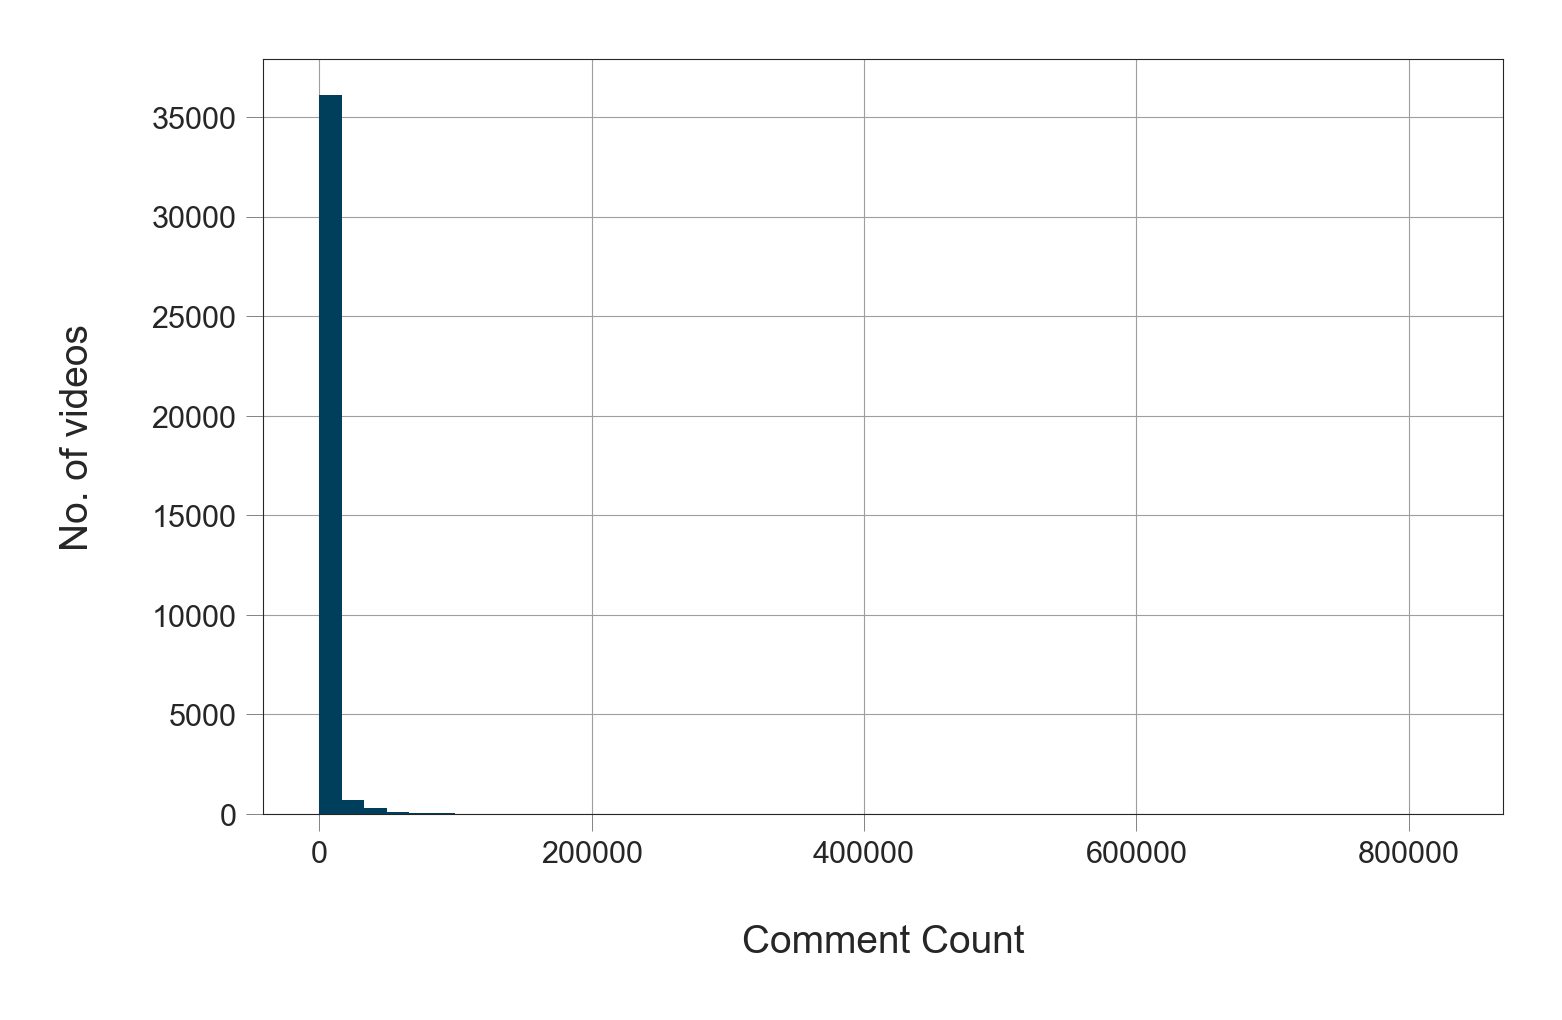

In [272]:
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

<p>
    <font 
          style="font-size:12;"
          >Let's get a closer look by eliminating entries with comment count larger than 200000 comment
</p>

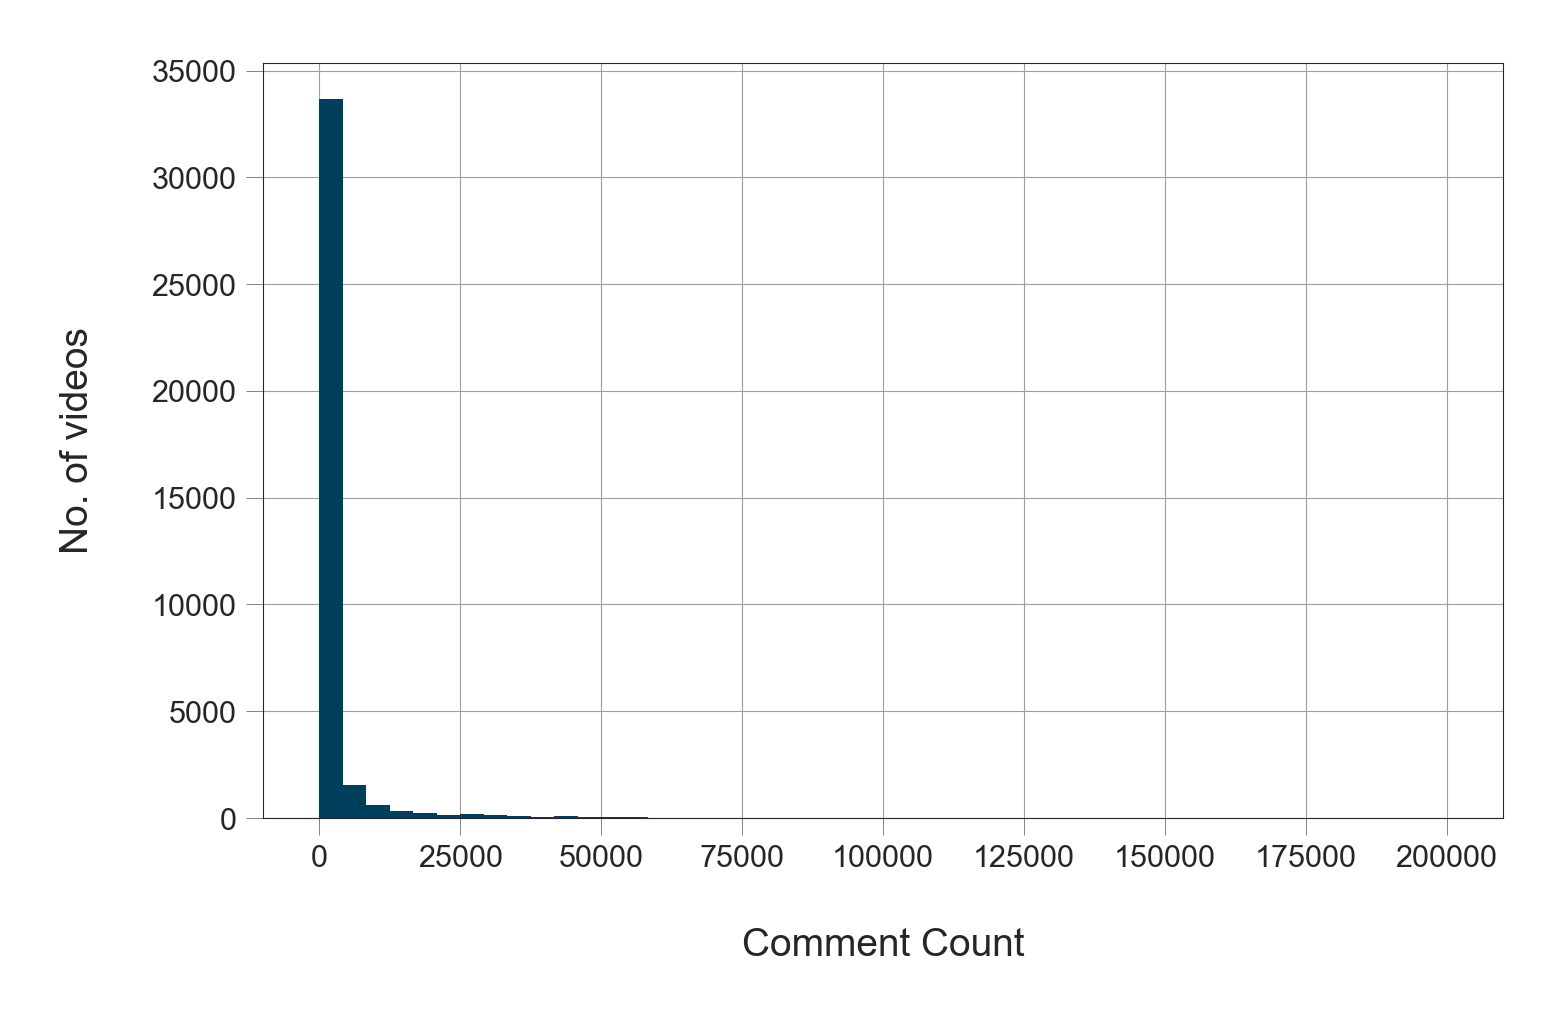

In [273]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

<p>
    <font 
          style="font-size:12;"
          >We see that most trending videos have around ~4166 comments<br>
 As with views and likes, let's see the exact percentage of videos with less than 4000 comments
</p>

In [274]:
df[df['comment_count'] < 4000]['comment_count'].count() / df['comment_count'].count() * 100

89.77297065752839

<p>
    <font 
          style="font-size:12;"
          >In a similar way, we can see that the percentage of videos with less than 25,000 comments is around 93%.
</p>

<h3>
    <font 
          style="font-size:20px;"
          color=#3367d6
          >Description on non-numerical columns
    </font>
</h3>

<p>
    <font 
          style="font-size:12;"
          >After we described numerical columns previously, we now describe non-numerical columns
</p>

In [275]:
df.describe(include = ['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,37352,37352,37352,37352,37352,37352,37352,37352
unique,16307,205,16721,1426,16339,12578,16523,13993
top,#NAME?,17.14.11,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,2018-04-21T13:30:01.000Z,[none],https://i.ytimg.com/vi/rRr1qiJRsXk/default.jpg,
freq,511,200,19,284,18,1381,16,561


<p>
    <font 
          style="font-size:12;"
          >From the table above, we can see that there are 205 unique dates, which means that our dataset contains collected data about trending videos over <b>205 days</b>.
</p>
<p>
    <font 
          style="font-size:12;"
          >From video_id description, we can see that there are 40949 videos (which is expected because our dataset contains 40949 entries), but we can see also that there are only 6351 unique videos which means that some videos appeared on the trending videos list <b>on more than one day</b>. The table also tells us that the top frequent title is WE MADE OUR MOM CRY...HER DREAM CAME TRUE! and that it appeared 30 times on the trending videos list.
</p>
<p>
    <font 
          style="font-size:12;"
          >But there is something strange in the description table above: Because there are 6351 unique video IDs, we expect to have 6351 unique video titles also, because we assume that each ID is linked to a corresponding title. One possible interpretation is that a trending video had some title when it appeared on the trending list, then it appeared again on another day but with a modified title. Similar explaination applies for description column as well. For publish_time column, the unique values are less than 6351, but there is nothing strange here, because two different videos may be published at the same time.
</p>
<p>
    <font 
          style="font-size:12;"
          >To verify our interpretation for title column, let's take a look at an example where a trending video appeared more than once on the trending list but with different titles
</p>

In [276]:
grouped = df.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
134,#NAME?,17.14.11,స‌మంత కంట‌త‌డి | Samantha became EMOTIONAL @ S...,Friday Poster,24,2017-11-13T08:59:27.000Z,"స‌మంత కంట‌త‌డి|""Samantha became EMOTIONAL @ Sa...",31052,36,11,2,https://i.ytimg.com/vi/-b0ww7L2MGU/default.jpg,False,False,False,స‌మంత కంట‌త‌డి | Samantha became EMOTIONAL @ S...
173,#NAME?,17.14.11,कुंभ राशि वालों के लिए 12 नवंबर - 18 नवंबर का ...,Jansatta,25,2017-11-11T09:09:06.000Z,"कुंभ राशि|""Astro""|""rashi""|""कुंभ""|""jansatta""",30659,180,36,3,https://i.ytimg.com/vi/-BcG_jN6DgE/default.jpg,False,False,False,
189,#NAME?,17.14.11,"घर में चुपचाप यहाँ रख दे एक लौंग , इतना बरसेगा...",Health Tips for You,26,2017-11-08T12:27:17.000Z,"tona totka|""tone""|""laal kitaab""|""lal kitaab""|""...",743321,2570,1154,294,https://i.ytimg.com/vi/-kj6W27Jj-8/default.jpg,False,False,False,"घर में चुपचाप यहाँ रख दे एक लौंग , इतना बरसेगा..."
298,#NAME?,17.15.11,18 नवम्बर 2017शनि अमावस्या को जरा से काले तिल ...,AstroMitram,22,2017-11-14T05:41:47.000Z,"Tiger Zinda Hai Trailer|""Tiger Zinda Hai Offic...",28816,376,31,29,https://i.ytimg.com/vi/-X33hZ1oTXI/default.jpg,False,False,False,शनि अमावस्या 18 नवम्बर 2017 को जरा से काले तिल...
360,#NAME?,17.15.11,BEST MOM EVER- Things you would love to hear f...,Old Delhi Films,24,2017-11-14T06:52:06.000Z,"Mother|""mom""|""best mom""|""best dad ever""|""best ...",14529,1018,131,83,https://i.ytimg.com/vi/-x9Bp5lFyM0/default.jpg,False,False,False,"Things your MOTHER will never say, still you r..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37136,#NAME?,18.13.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",675923,4642,908,920,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,False,False,False,#BiggBossTelugu2
37194,#NAME?,18.14.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",1014376,5974,1414,1132,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,False,False,False,#BiggBossTelugu2
37202,#NAME?,18.14.06,Dumbo Official Teaser Trailer,Disney Movie Trailers,1,2018-06-13T07:00:00.000Z,"Disney|""Walt Disney Studios""|""Dumbo""|""Flying E...",4427381,96391,5508,12726,https://i.ytimg.com/vi/-QPdRfqTnt4/default.jpg,False,False,False,Watch the teaser trailer for Tim Burton’s all-...
37316,#NAME?,18.14.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",1014376,5974,1414,1132,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,False,False,False,#BiggBossTelugu2


<p>
    <font 
          style="font-size:12;"
          >We can see that this video appeared on the list with two different titles.
</p>

<h3>
    <font 
          style="font-size:20px;"
          color=#3367d6
          >How many trending video titles contain capitalized word?
    </font>
</h3>

<p>
    <font 
          style="font-size:12;"
          >Now we want to see how many trending video titles contain at least a capitalized word (e.g. HOW). To do that, we will add a new variable (column) to the dataset whose value is True if the video title has at least a capitalized word in it, and False otherwise
</p>

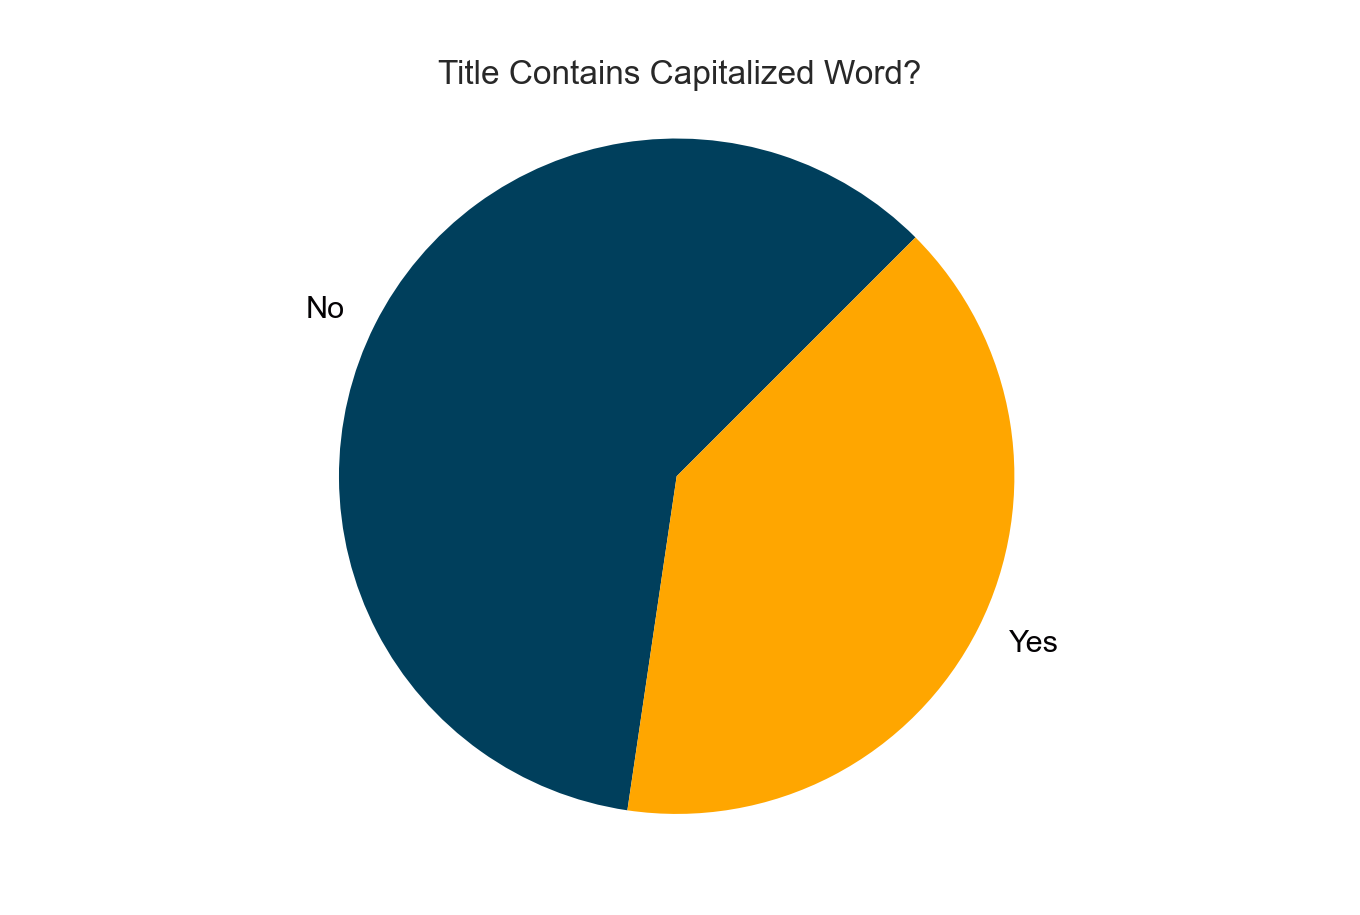

In [277]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [278]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.60
True    0.40
Name: contains_capitalized, dtype: float64

<p>
    <font 
          style="font-size:12;"
          >We can see that 44% of trending video titles contain at least a capitalized word. We will later use this added new column contains_capitalized in analyzing correlation between variables.
</p>

<h3>
    <font 
          style="font-size:20px;"
          color=#3367d6
          >Video title lengths
    </font>
</h3>

<p>
    <font 
          style="font-size:12;"
          >Let's add another column to our dataset to represent the length of each video title, then plot the histogram of title length to get an idea about the lengths of trnding video titles
</p>

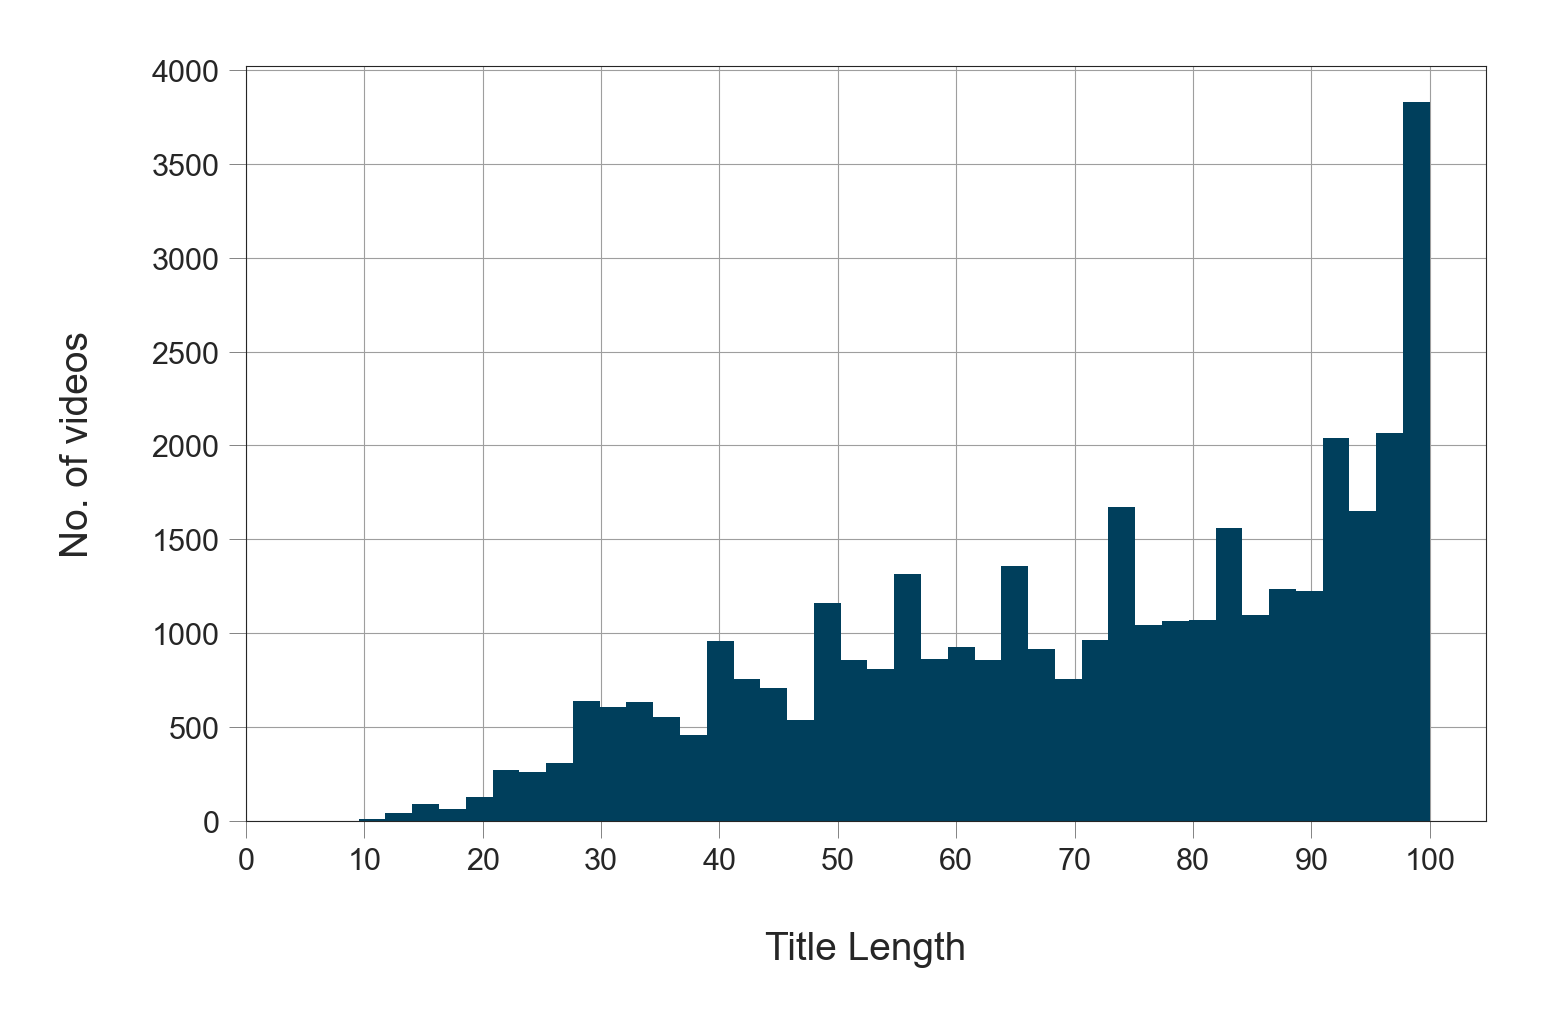

In [279]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

<p>
    <font 
          style="font-size:12;"
          >We can see that title-length distribution resembles a normal distribution, where most videos have title lengths between 30 and 60 character approximately.<br><br>
        Now let's draw a scatter plot between title length and number of views to see the relationship between these two variables
</p>

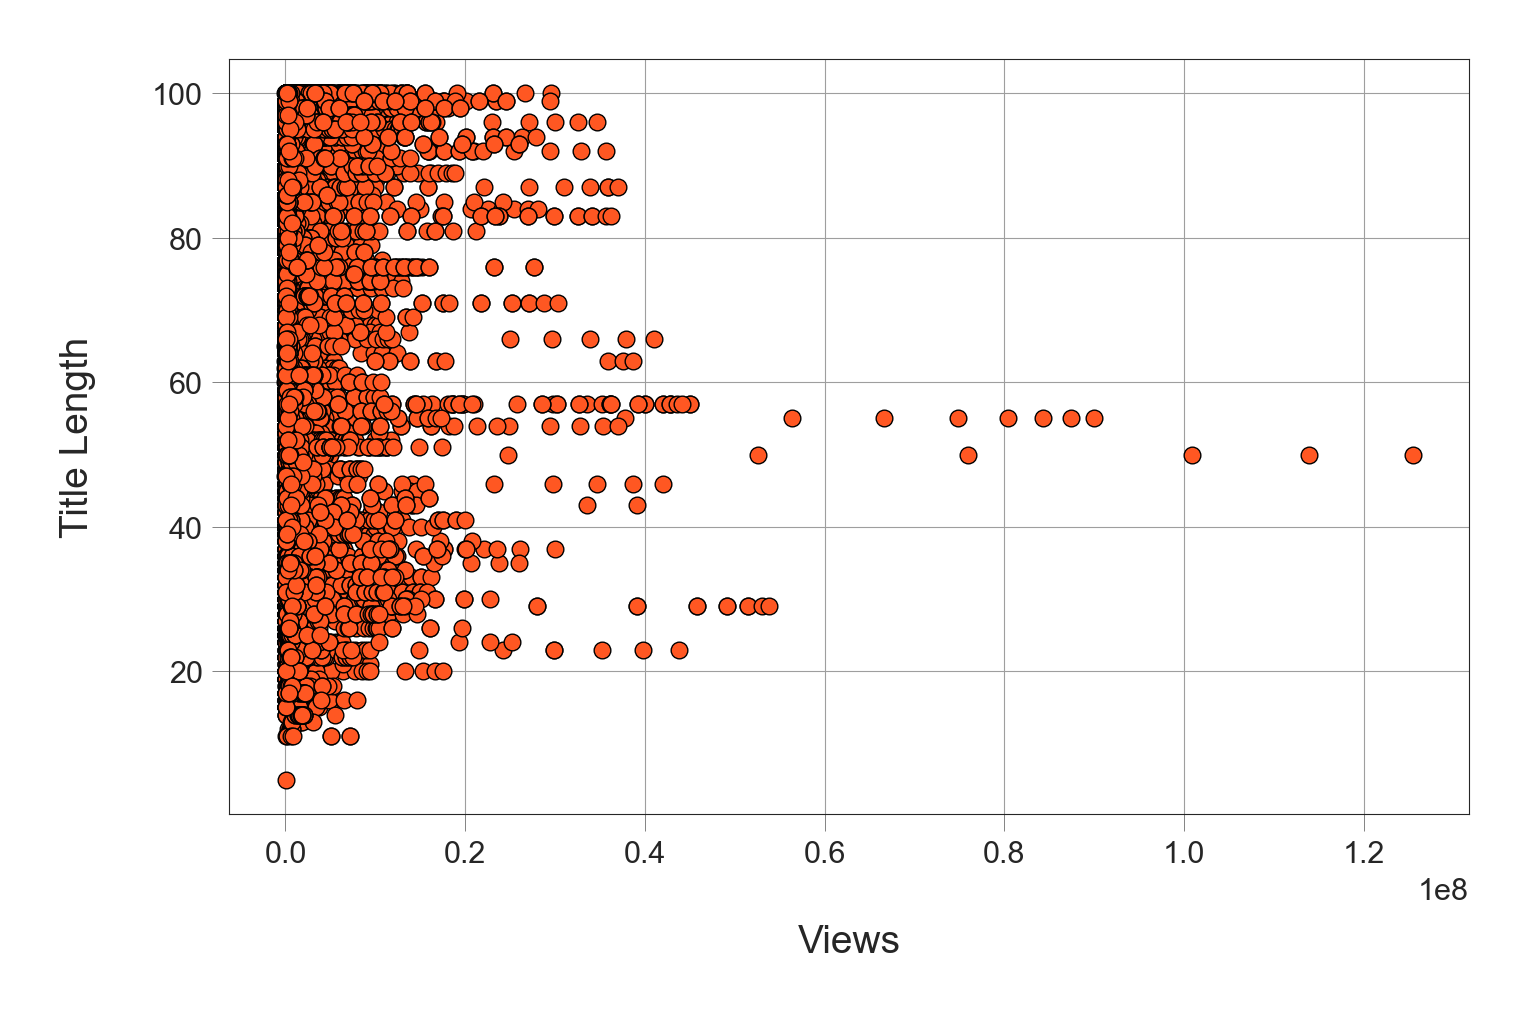

In [280]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

<p>
    <font 
          style="font-size:12;"
          >By looking at the scatter plot, we can say that there is no relationship between the title length and the number of views. However, we notice an interesting thing: videos that have 100,000,000 views and more have title length between 33 and 55 characters approximately.
</p>

<h3>
    <font 
          style="font-size:20px;"
          color=#3367d6
          >Correlation Between Dataset Variables
    </font>
</h3>

<p>
    <font 
          style="font-size:12;"
          >Now let's see how the dataset variables are correlated with each other: for example, we would like to see how views and likes are correlated, meaning do views and likes increase and decrease together (positive correlation)? Does one of them increase when the other decrease and vice versa (negative correlation)? Or are they not correlated?<br><br>
        Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1 denotes the highest negative correlation, and 0 denotes that there is no correlation.<br><br>
        Let's see the correlation table between our dataset variables (numerical and boolean variables only)
</p>

In [281]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,contains_capitalized,title_length
category_id,1.00,-0.18,-0.13,-0.04,-0.04,0.04,0.06,-0.05,0.02,-0.16
views,-0.18,1.00,0.85,0.54,0.67,-0.03,-0.03,0.00,-0.02,-0.05
likes,-0.13,0.85,1.00,0.49,0.78,-0.05,-0.04,0.03,-0.01,-0.17
dislikes,-0.04,0.54,0.49,1.00,0.71,-0.01,-0.02,0.00,-0.01,-0.03
comment_count,-0.04,0.67,0.78,0.71,1.00,-0.03,-0.02,0.02,0.01,-0.12
comments_disabled,0.04,-0.03,-0.05,-0.01,-0.03,1.00,0.35,-0.00,-0.02,0.09
ratings_disabled,0.06,-0.03,-0.04,-0.02,-0.02,0.35,1.00,-0.00,-0.01,0.05
video_error_or_removed,-0.05,0.00,0.03,0.00,0.02,-0.00,-0.00,1.00,-0.01,-0.03
contains_capitalized,0.02,-0.02,-0.01,-0.01,0.01,-0.02,-0.01,-0.01,1.00,-0.01
title_length,-0.16,-0.05,-0.17,-0.03,-0.12,0.09,0.05,-0.03,-0.01,1.00


<p>
    <font 
          style="font-size:12;"
          >We see for example that views and likes are highly positively correlated with a correlation value of 0.85; we see also a high positive correlation (0.80) between likes and comment count, and between dislikes and comment count (0.70).<br><br>
        There is some positive correlation between views and dislikes, between views and comment count, between likes and dislikes.<br><br>
        Now let's visualize the correlation table above using a heatmap
</p>

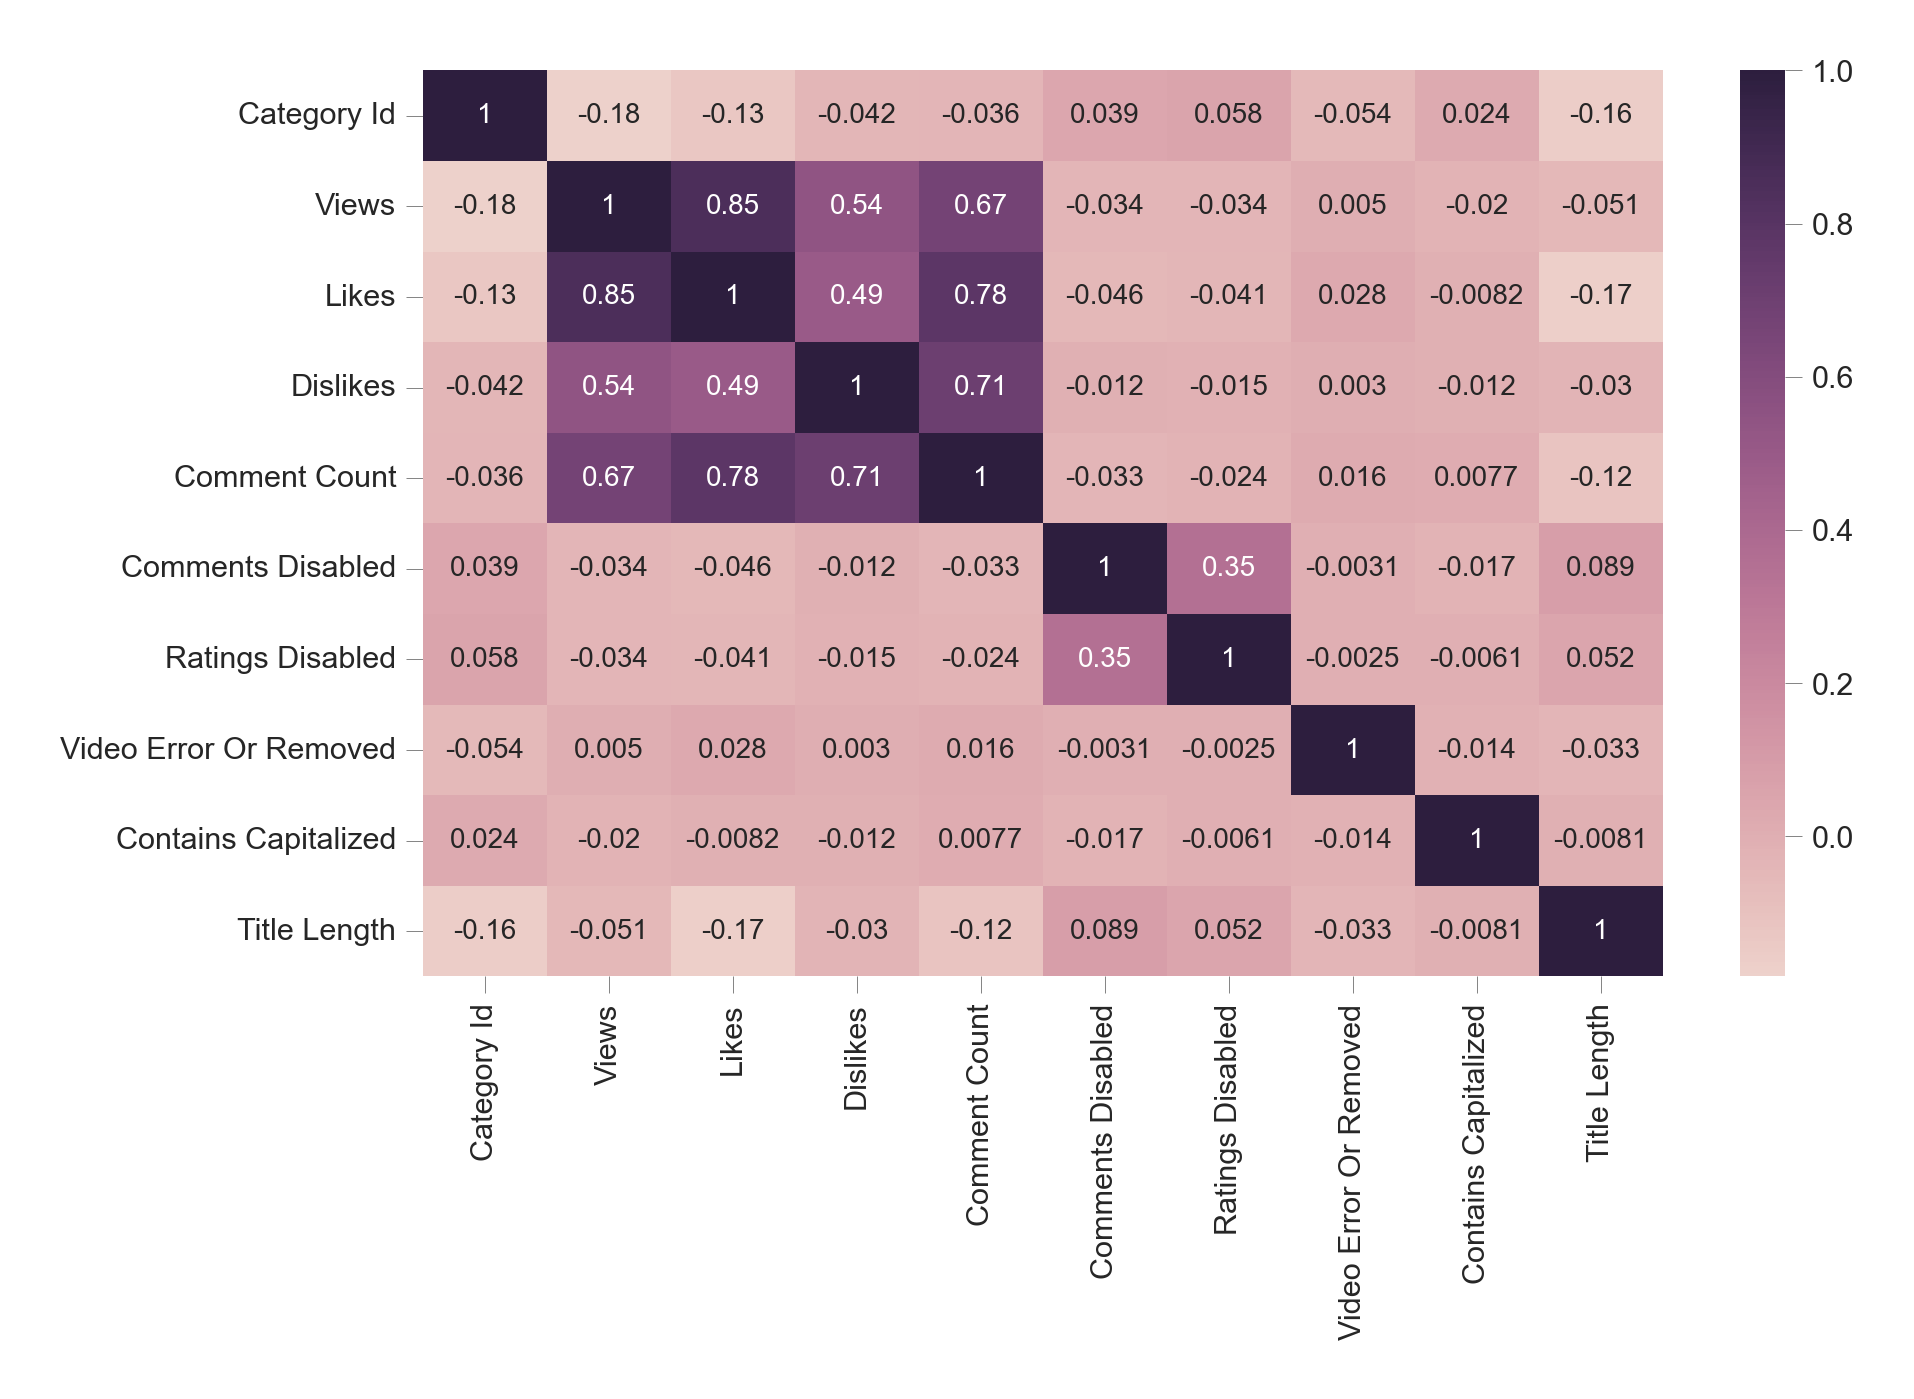

In [282]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

<p>
    <font 
          style="font-size:12;"
          >The correlation map and correlation table above say that views and likes are highly positively correlated. Let's verify that by plotting a scatter plot between views and likes to visualize the relationship between these variables
</p>

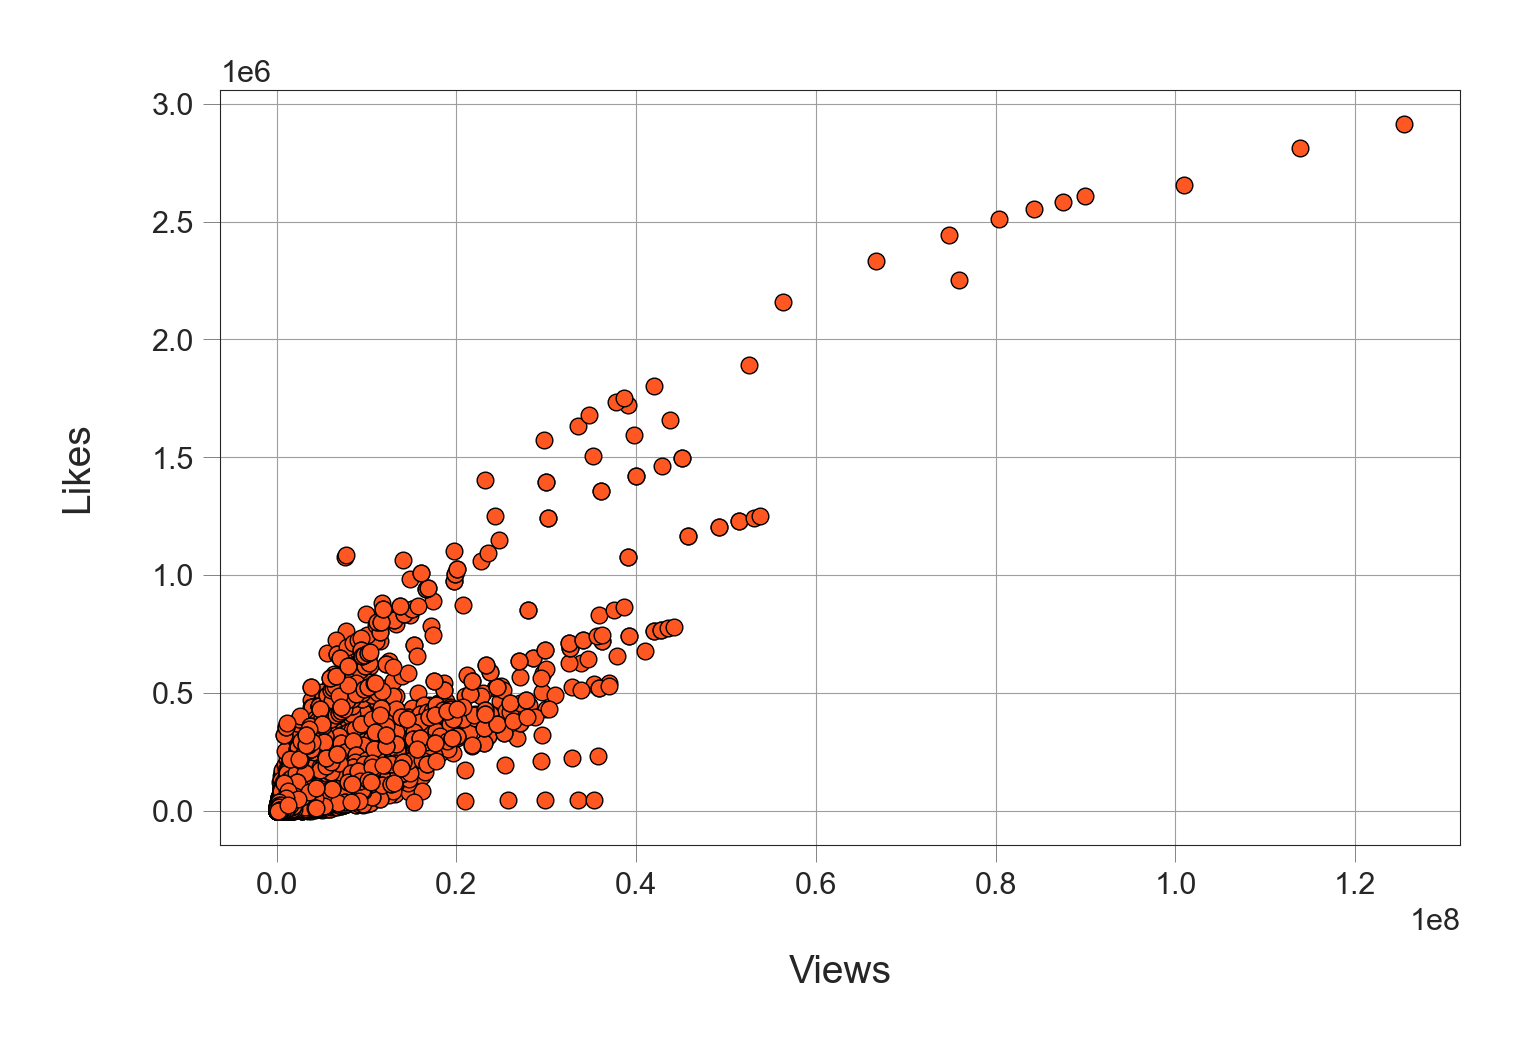

In [283]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

<p>
    <font 
          style="font-size:12;"
          >We see that views and likes are truly positively correlated: as one increases, the other increases too—mostly.<br><br>
        Another verification of the correlation matrix and map is the scatter plot we drew above between views and title length as it shows that there is no correlation between them.
</p>

<h3>
    <font 
          style="font-size:20px;"
          color=#3367d6
          >Most Common Words in Video Titles
    </font>
</h3>

<p>
    <font 
          style="font-size:12;"
          >Let's see if there are some words that are used significantly in trending video titles. We will display the 25 most common words in all trending video titles
</p>

In [284]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 41986),
 ('-', 15777),
 ('2018', 6790),
 ('Episode', 4162),
 ('||', 3713),
 ('Full', 1940),
 ('The', 1890),
 ('Movie', 1854),
 ('Song', 1836),
 ('2017', 1693),
 ('Telugu', 1676),
 ('News', 1613),
 ('&', 1601),
 ('Video', 1594),
 ('Latest', 1437),
 ('Official', 1392),
 ('Trailer', 1306),
 ('to', 1306),
 (':', 1293),
 ('in', 1248),
 ('Songs', 1149),
 ('2', 1143),
 ('New', 1137),
 ('May', 1075),
 ('Punjabi', 1037)]

<p>
    <font 
          style="font-size:12;"
          >Ignoring words like "the" and "of", we can see that "-" and "|" symbols occured a lot in the 40949 trending video titles: 11452 times and 10663 times respectively. We notice also that words "Video", "Trailer", "How", and "2018" are common in trending video titles; each occured in 1613-1901 video titles.

Let's draw a word cloud for the titles of our trending videos, which is a way to visualize most common words in the titles; the more common the word is, the bigger its font size is
</p>

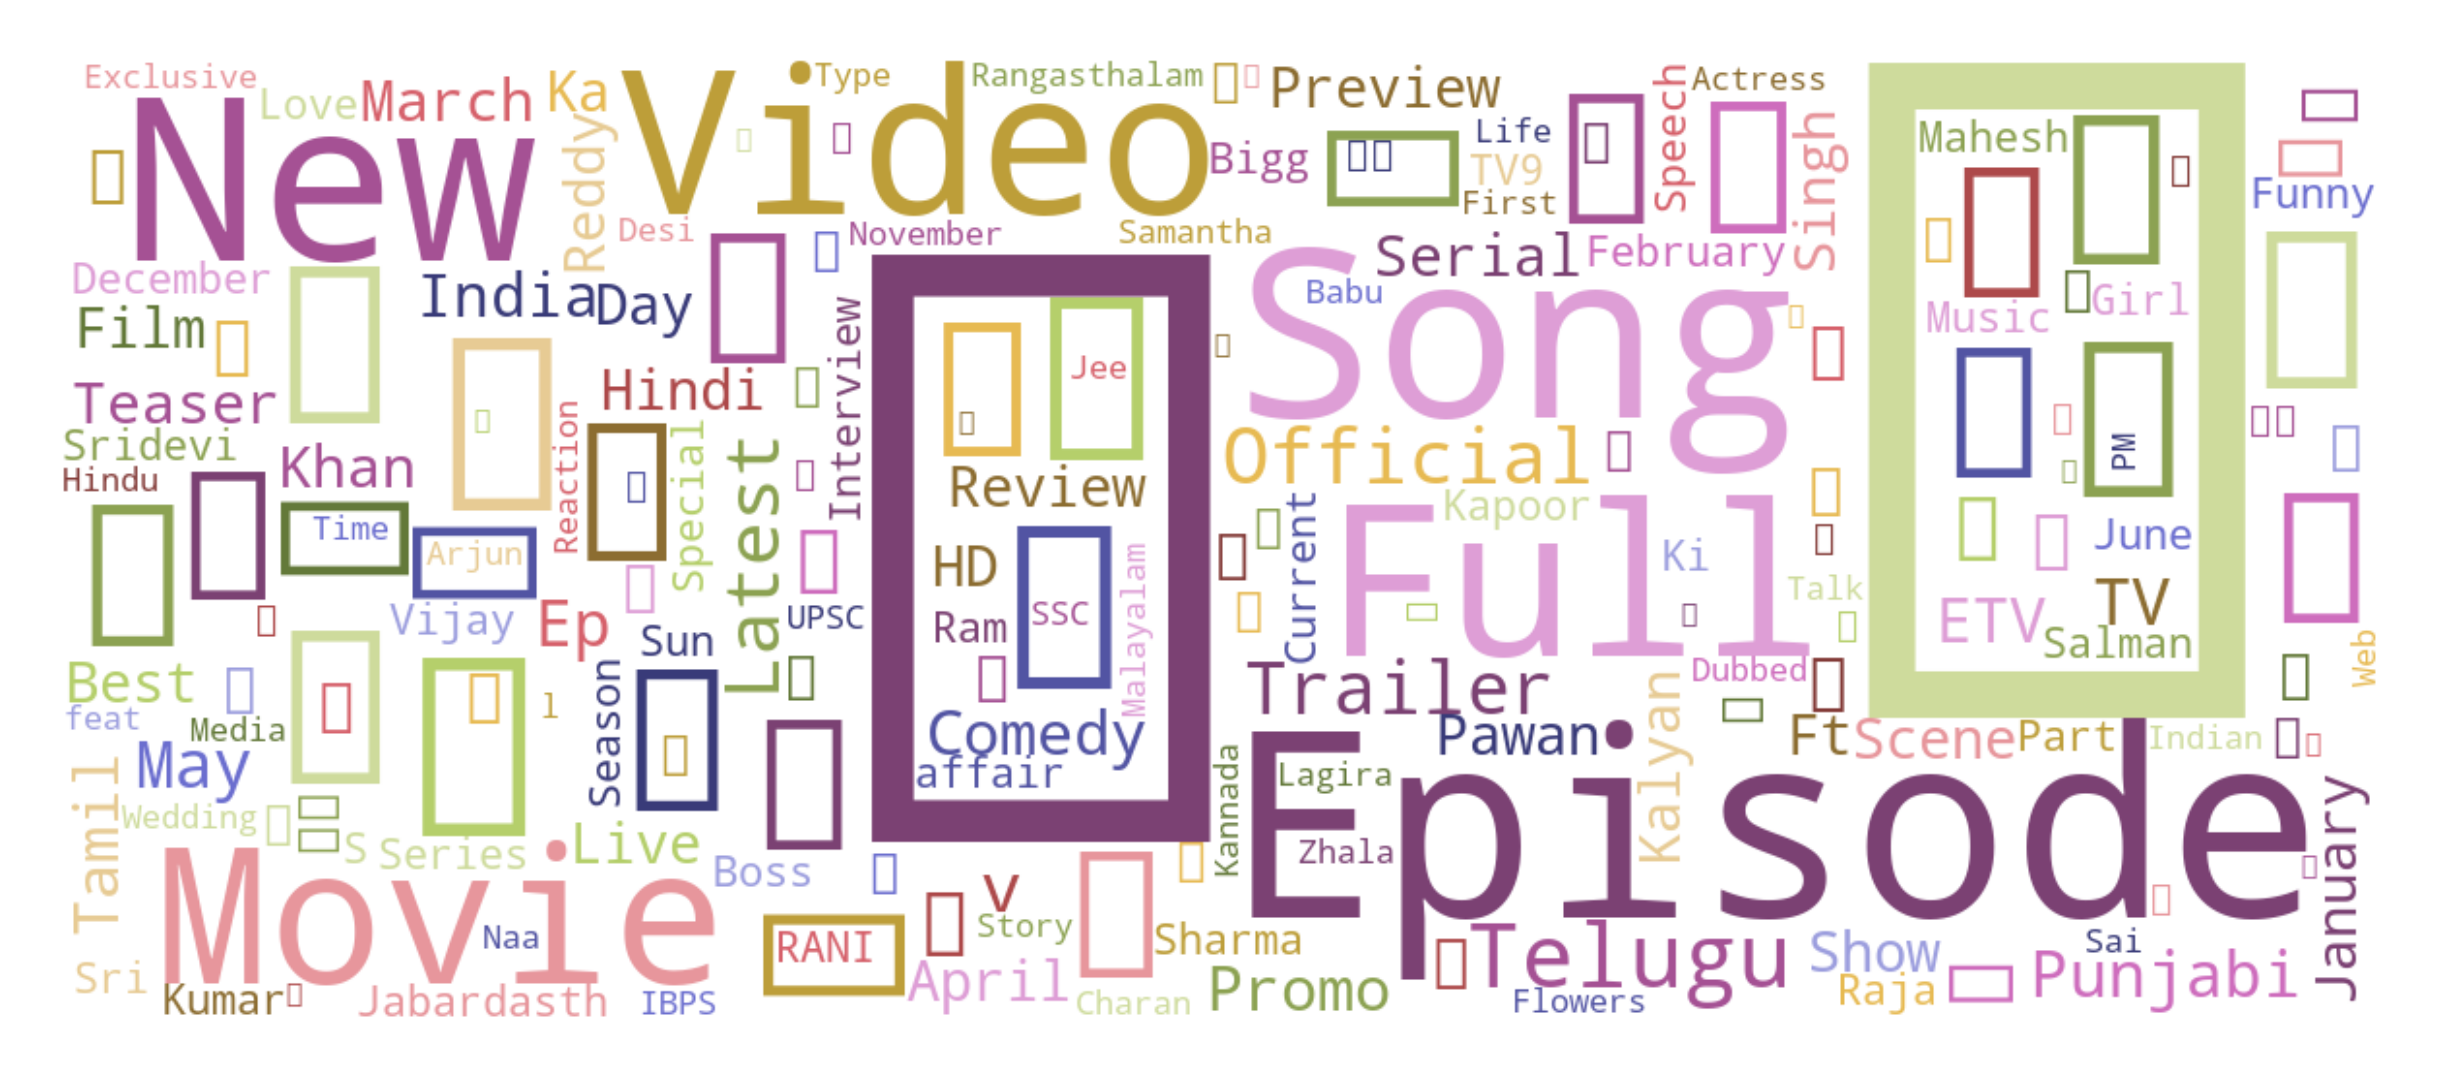

In [285]:
# wc = wordcloud.WordCloud(width=1200, height=600, collocations=False, stopwords=None, background_color="white", colormap="tab20b").generate_from_frequencies(dict(Counter(title_words).most_common(150)))
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

<h3>
    <font 
          style="font-size:20px;"
          color=#3367d6
          >Which channels have the largest number of trending videos?
    </font>
</h3>

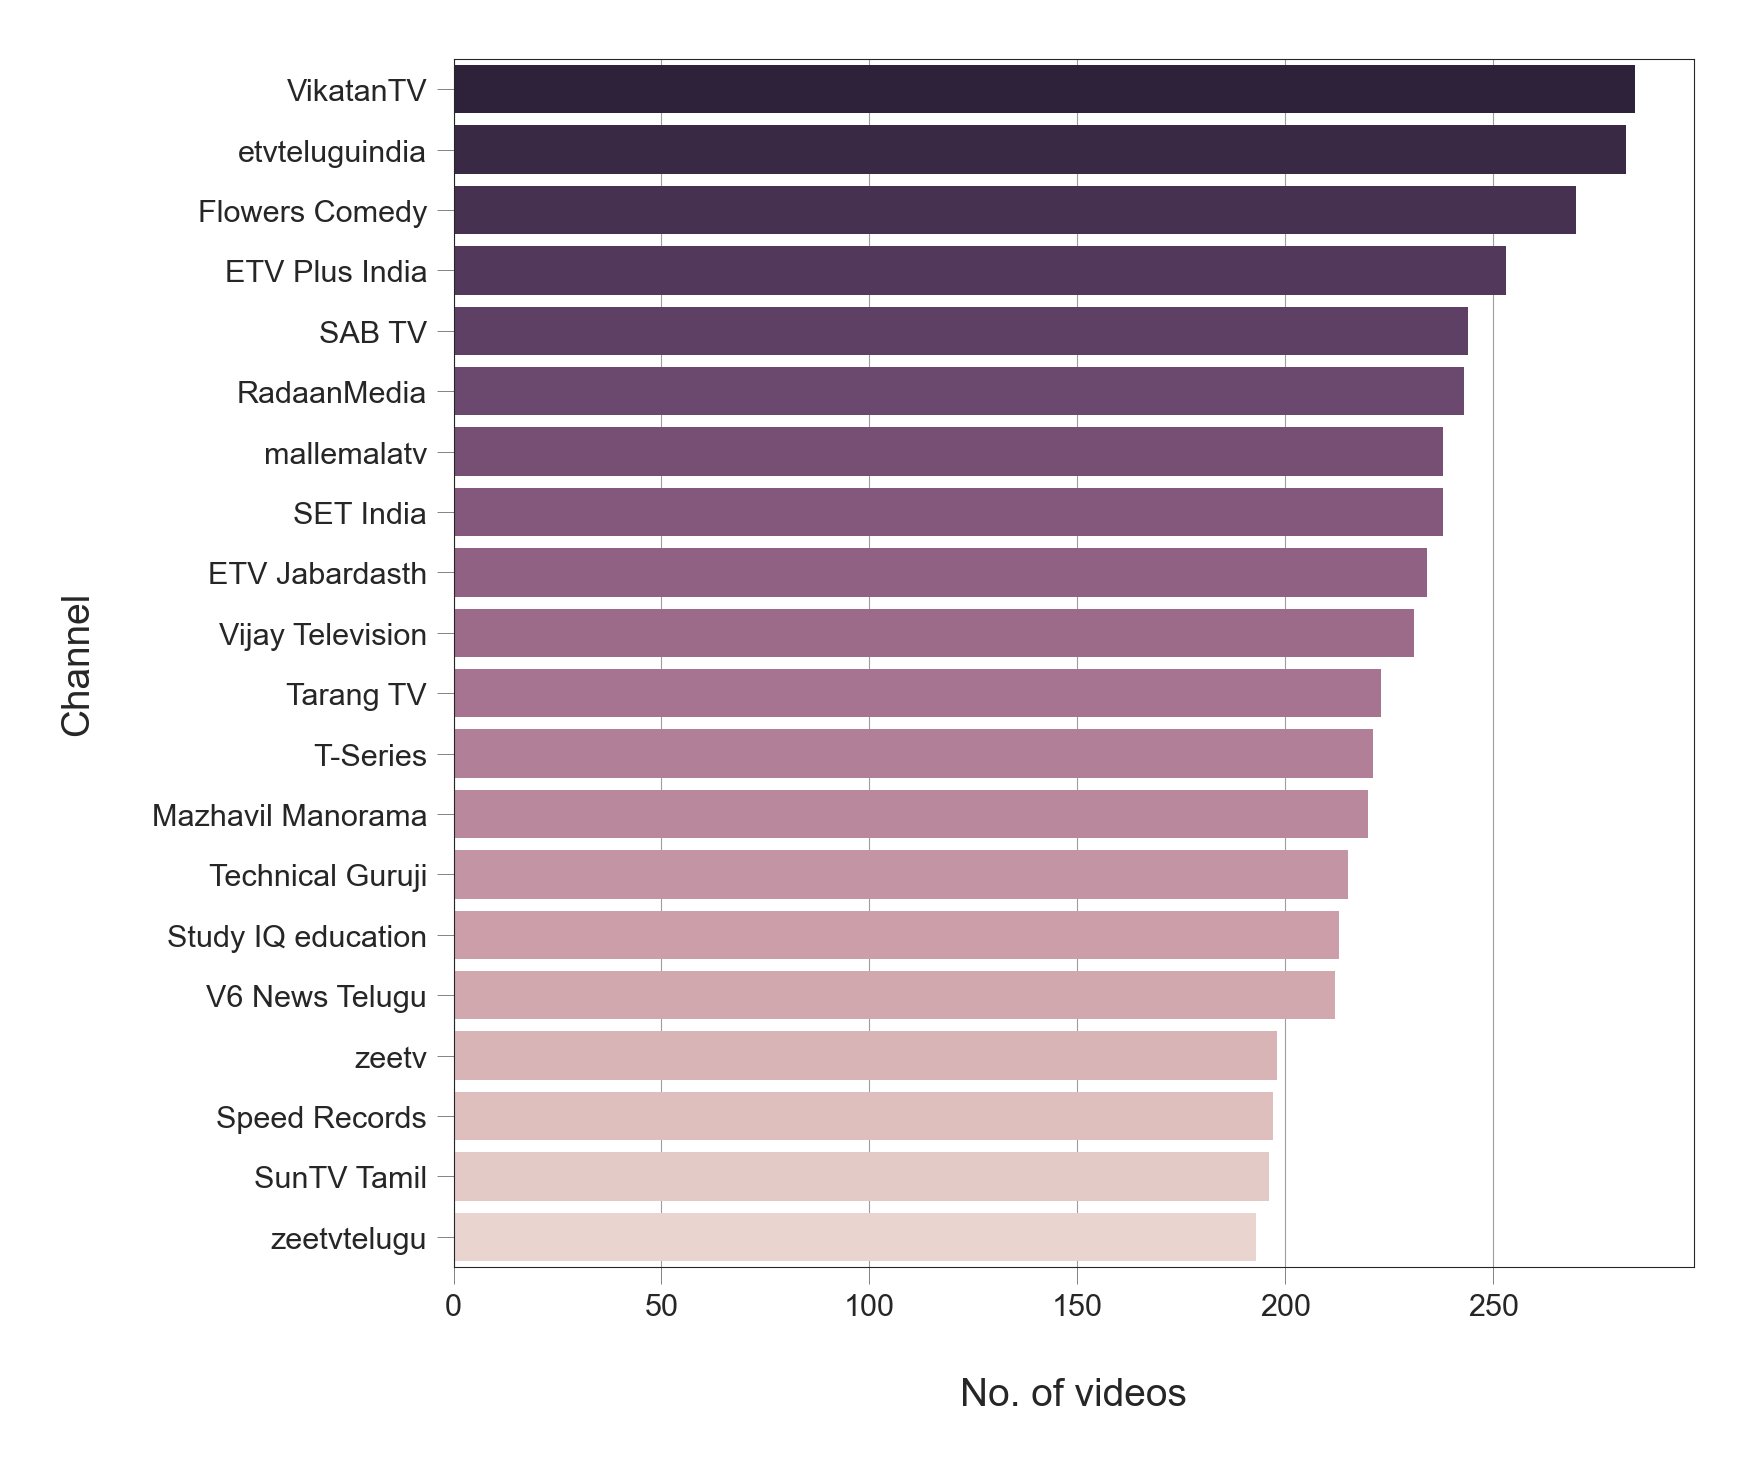

In [286]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

<h3>
    <font 
          style="font-size:20px;"
          color=#3367d6
          >Which video category has the largest number of trending videos?
    </font>
</h3>

<p>
    <font 
          style="font-size:12;"
          >First, we will add a column that contains category names based on the values in category_id column. We will use a category JSON file provided with the dataset which contains information about each category.
</p>

In [287]:
with open(r"E:\Case Study\YouTube Trending Video\DataSet\IN_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

<p>
    <font 
          style="font-size:12;"
          >Now we can see which category had the largest number of trending videos
</p>

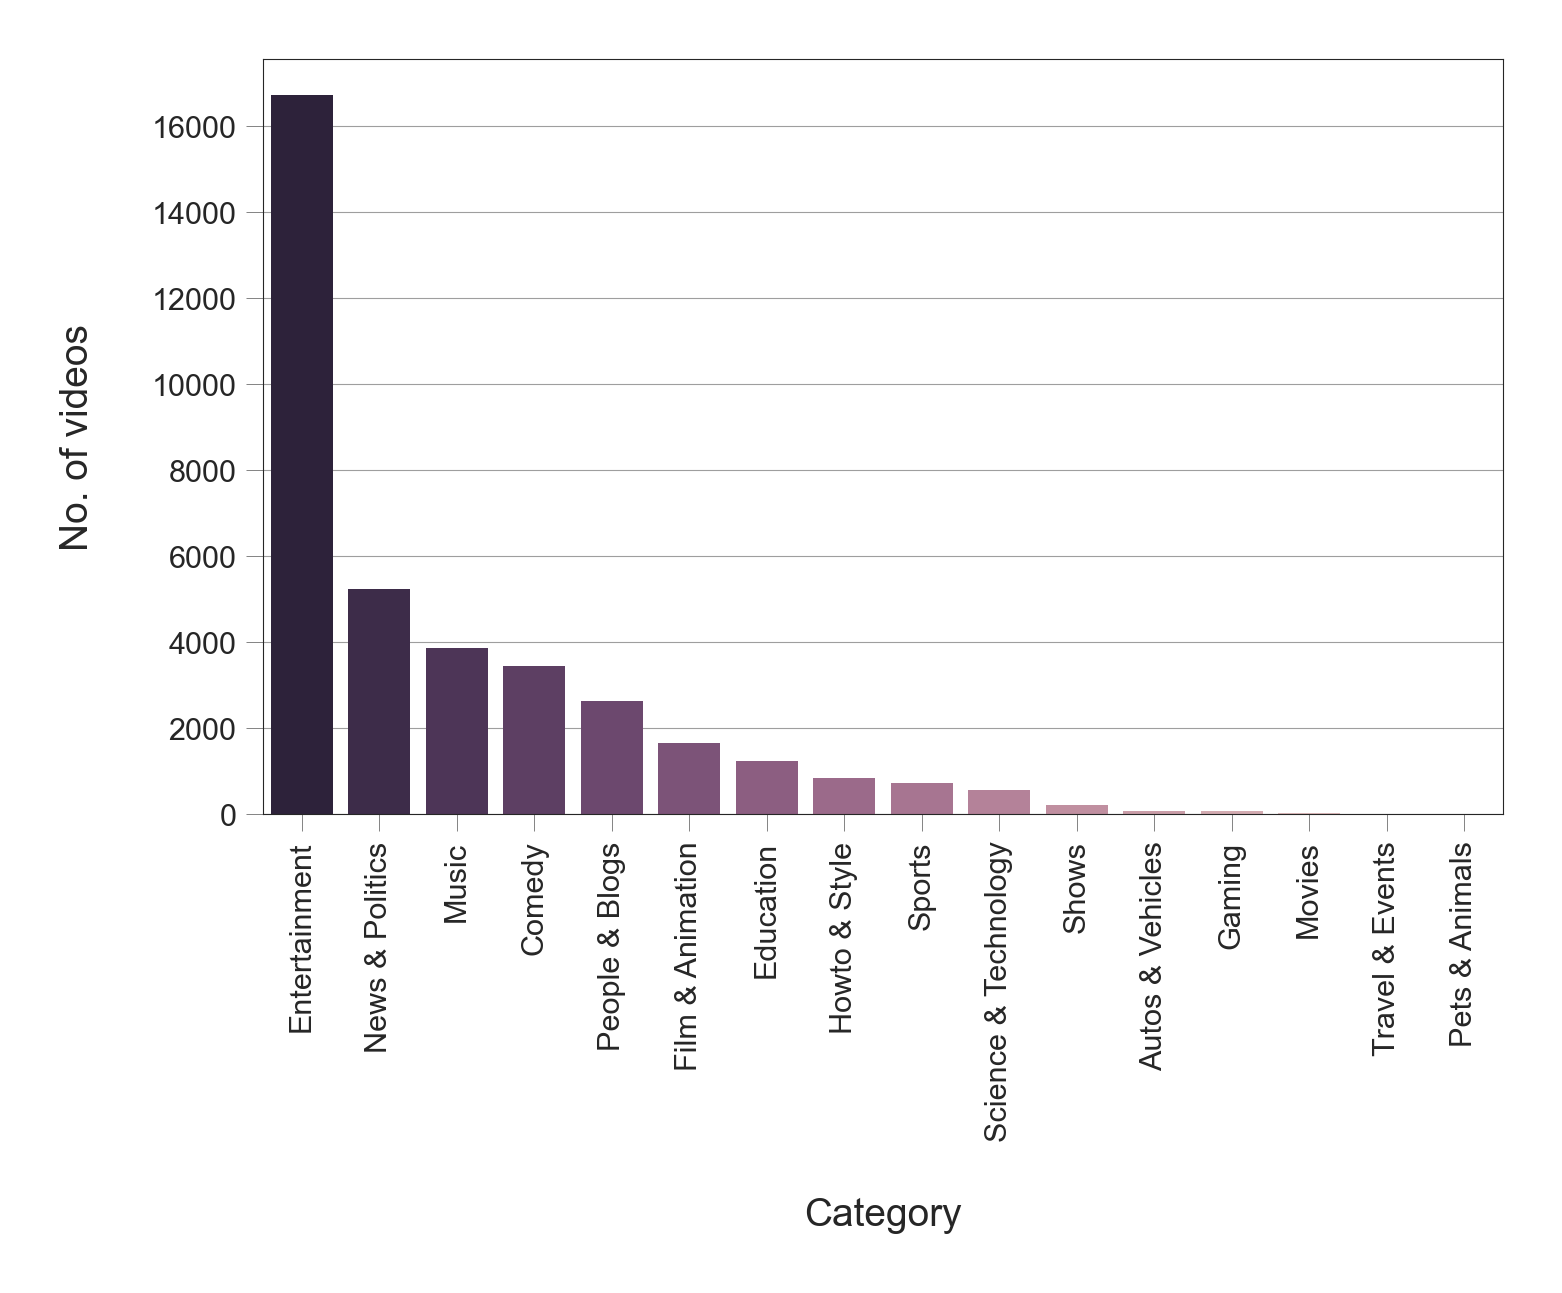

In [288]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

<p>
    <font 
          style="font-size:12;"
          >We see that the Entertainment category contains the largest number of trending videos among other categories: around 10,000 videos, followed by Music category with around 6,200 videos, followed by Howto & Style category with around 4,100 videos, and so on.
</p>

<h3>
    <font 
          style="font-size:20px;"
          color=#3367d6
          >Trending videos and their publishing time
    </font>
</h3>

<p>
    <font 
          style="font-size:12;"
          >An example value of the publish_time column in our dataset is 2017-11-13T17:13:01.000Z. And according to information on this page: <a href="https://www.w3.org/TR/NOTE-datetime">https://www.w3.org/TR/NOTE-datetime</a>, this means that the date of publishing the video is 2017-11-13 and the time is 17:13:01 in Coordinated Universal Time (UTC) time zone.<br><br>
        Let's add two columns to represent the date and hour of publishing each video, then delete the original publish_time column because we will not need it anymore
</p>

In [289]:
df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])
df.drop(labels='publish_time', axis=1, inplace=True)

<p>
    <font 
          style="font-size:12;"
          >Now we can see which days of the week had the largest numbers of trending videos
</p>

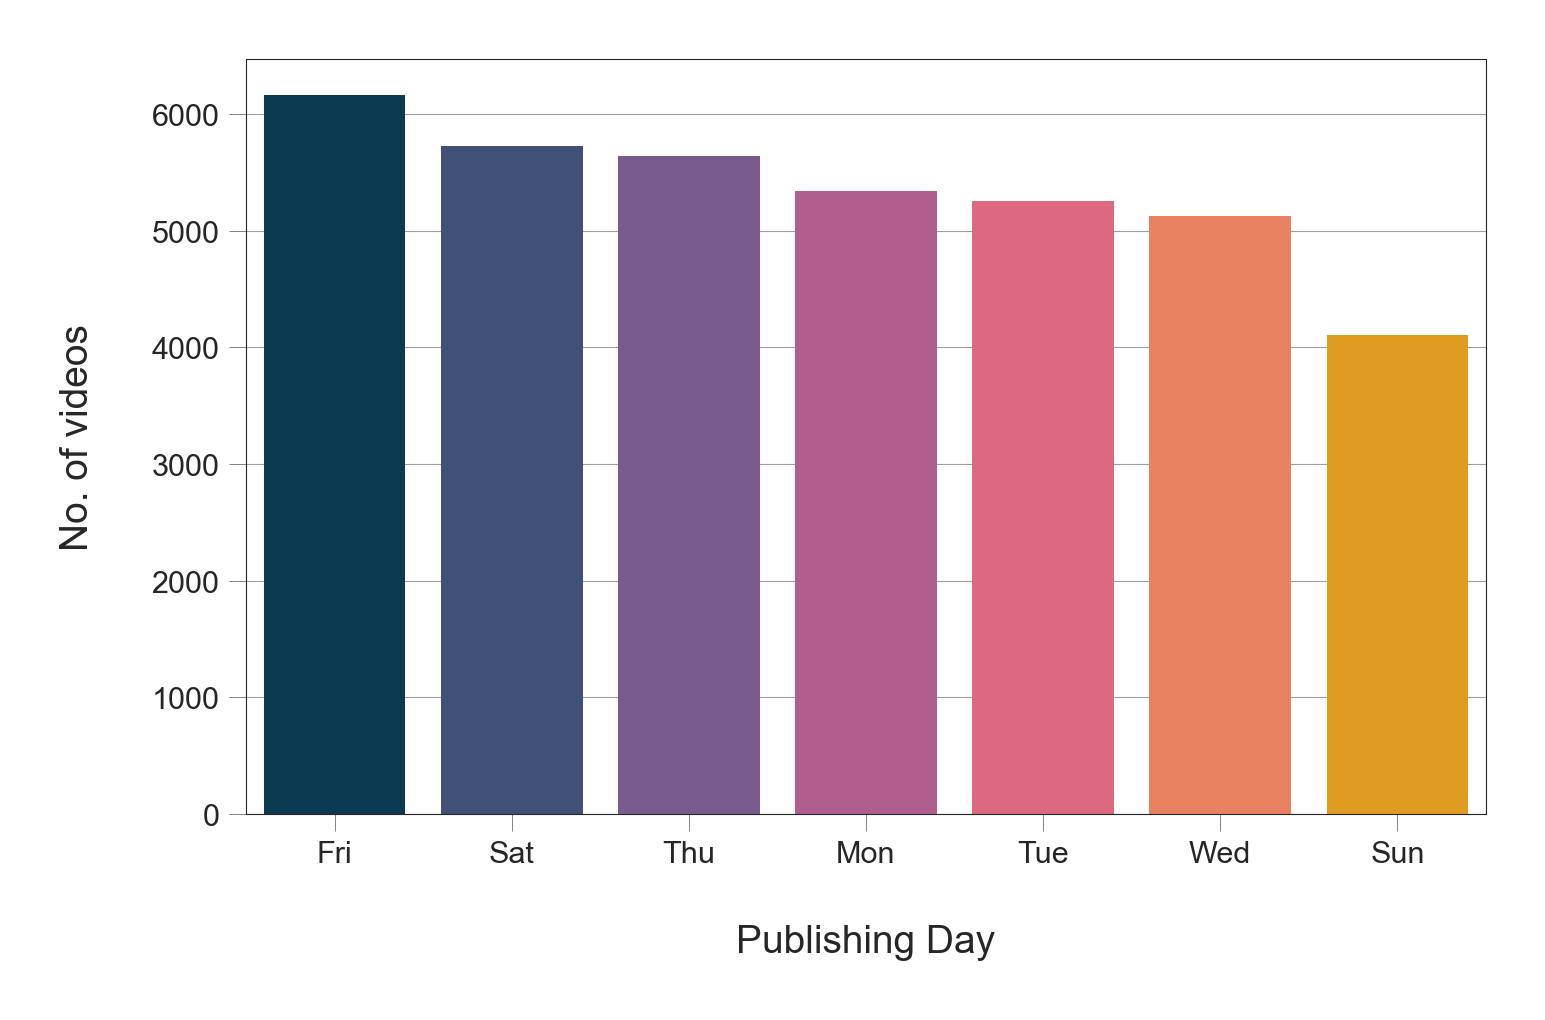

In [290]:
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

<p>
    <font 
          style="font-size:12;"
          >We can see that the number of trending videos published on Sunday and Saturday are noticeably less than the number of trending videos published on other days of the week.<br><br>
        Now let's use publishing_hour column to see which publishing hours had the largest number of trending videos
</p>

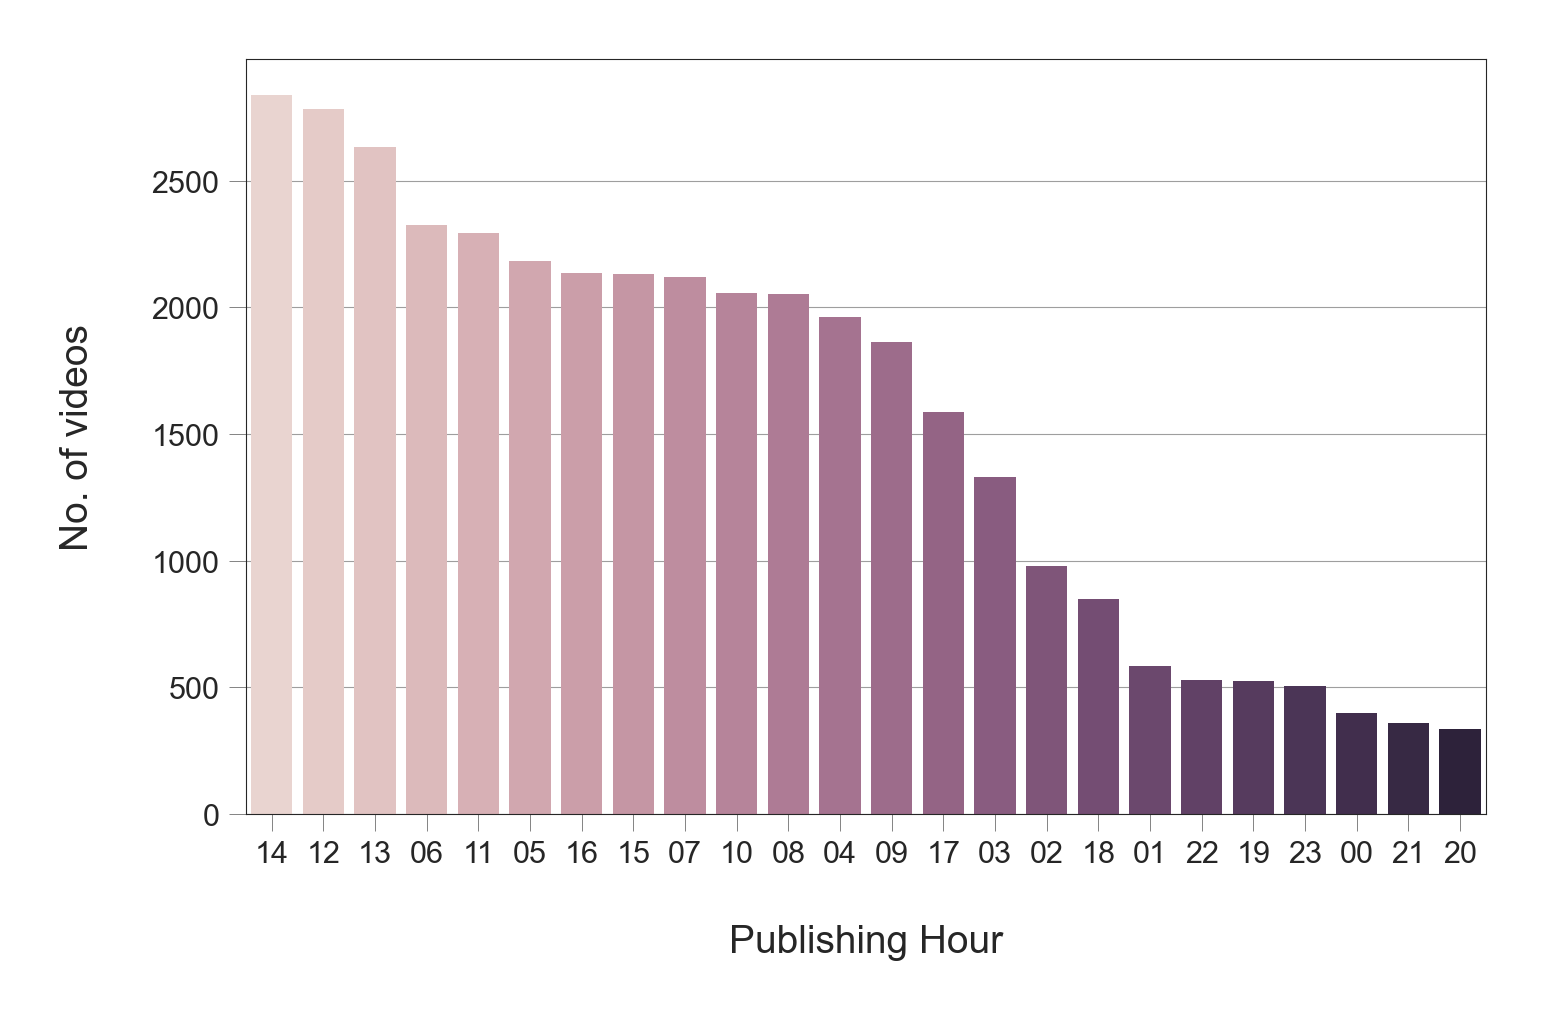

In [291]:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

<p>
    <font 
          style="font-size:12;"
          >We can see that the period between 2PM and 7PM, peaking between 4PM and 5PM, had the largest number of trending videos. We notice also that the period between 12AM and 1PM has the smallest number of trending videos. But why is that? Is it because people publish a lot more videos between 2PM and 7PM? Is it because how YouTube algorithm chooses trending videos?
</p>

<h3>
    <font 
          style="font-size:20px;"
          color=#3367d6
          >How many trending videos have an error?
    </font>
</h3>

<p>
    <font 
          style="font-size:12;"
          >To see how many trending videos got removed or had some error, we can use video_error_or_removed column in the dataset
</p>

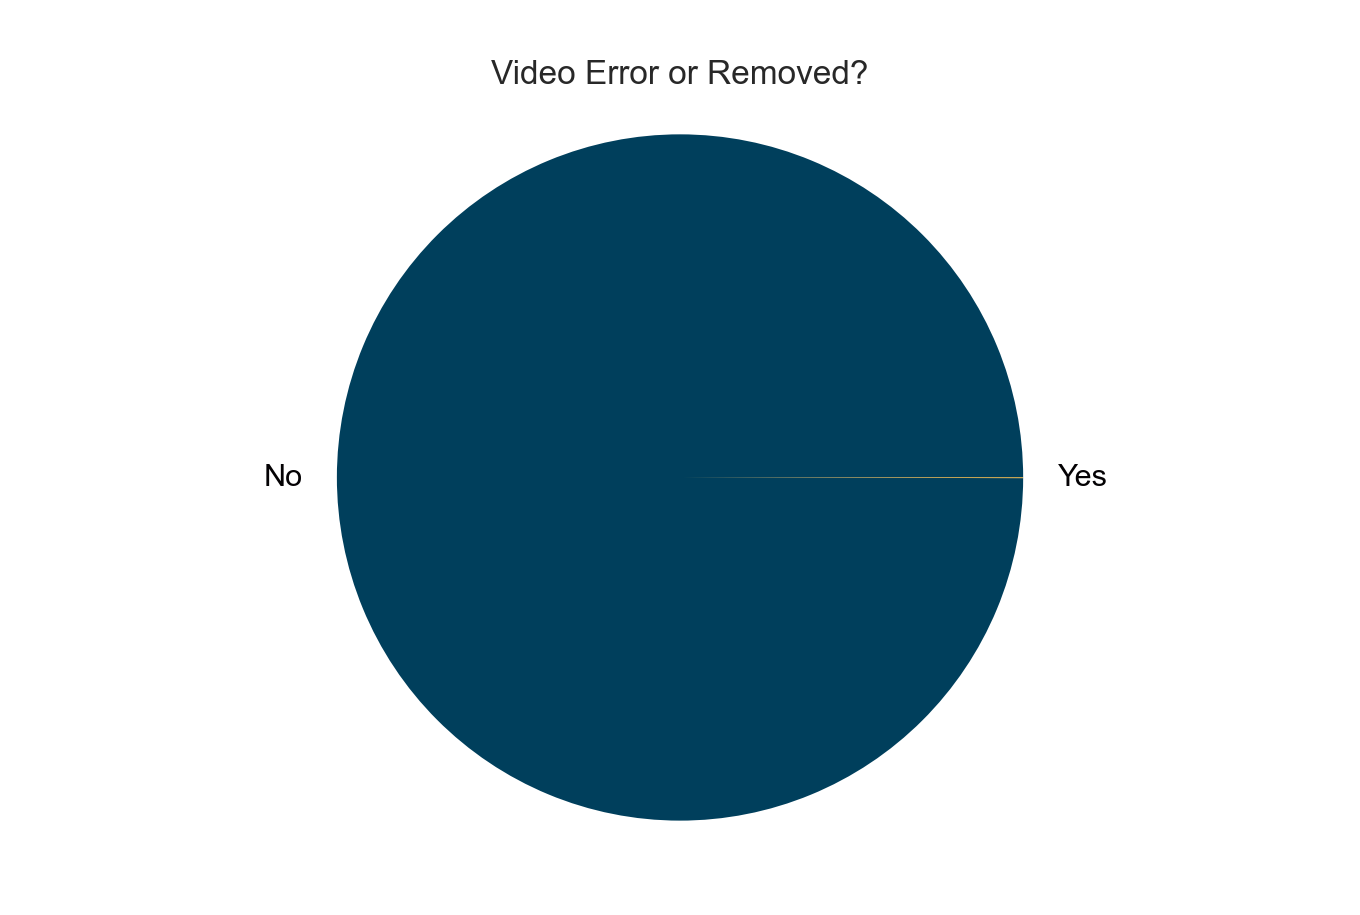

In [292]:
value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Video Error or Removed?')

In [293]:
df["video_error_or_removed"].value_counts()

False    37341
True        11
Name: video_error_or_removed, dtype: int64

<p>
    <font 
          style="font-size:12;"
          >We can see that out of videos that appeared on trending list (40949 videos), there is a tiny portion (23 videos) with errors.
</p>

<h3>
    <font 
          style="font-size:20px;"
          color=#3367d6
          >How many trending videos have their commets disabled?
    </font>
</h3>

<p>
    <font 
          style="font-size:12;"
          >To know that, we use comments_disabled column
</p>

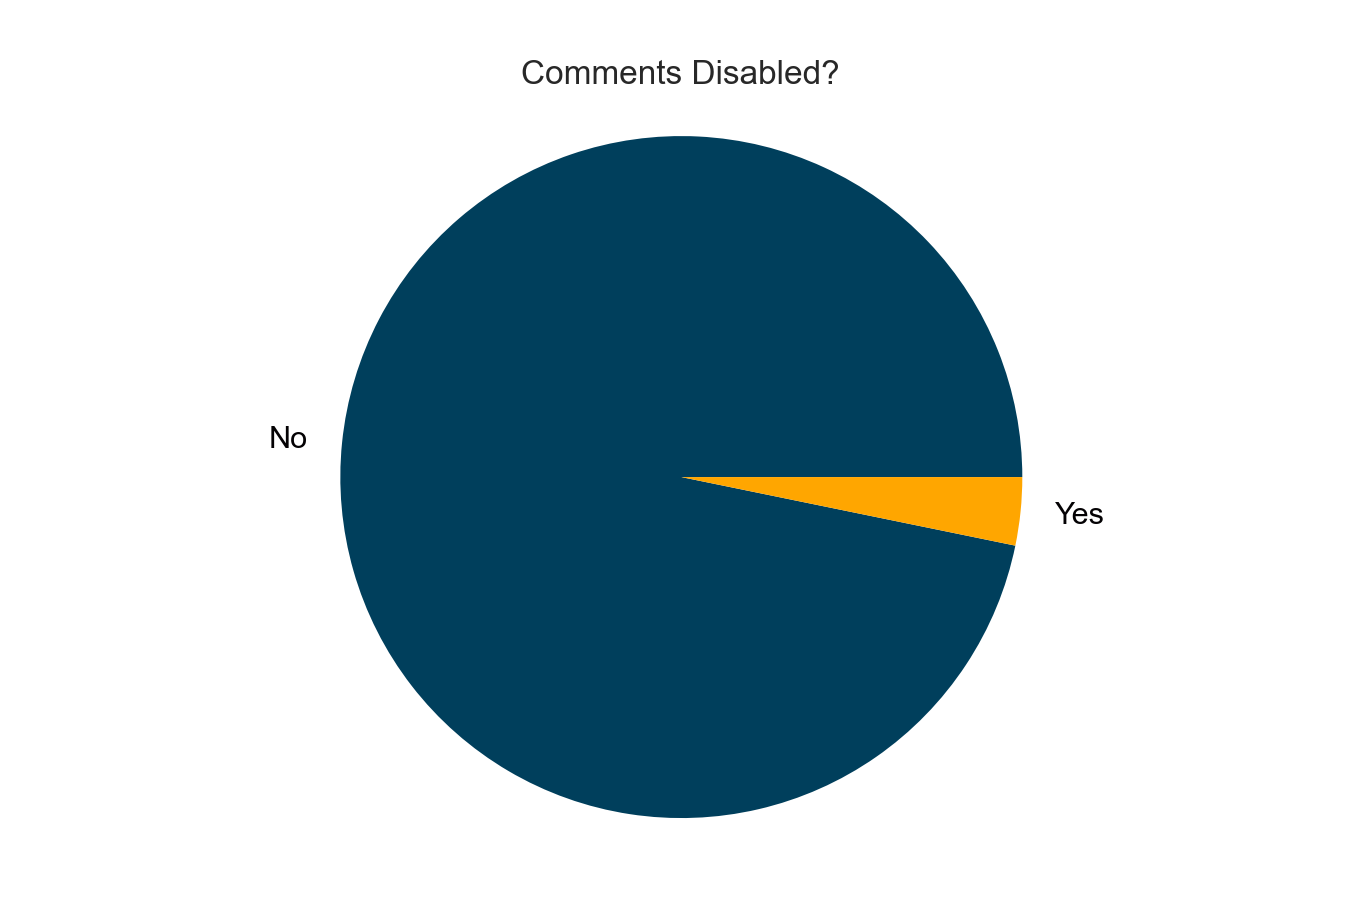

In [294]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')

In [295]:
df["comments_disabled"].value_counts(normalize=True)

False   0.97
True    0.03
Name: comments_disabled, dtype: float64

<p>
    <font 
          style="font-size:12;"
          >We see that only 2% of trending videos prevented users from commenting.
</p>

<h3>
    <font 
          style="font-size:20px;"
          color=#3367d6
          >How many trending videos have their ratings disabled?
    </font>
</h3>

<p>
    <font 
          style="font-size:12;"
          >To know that, we use ratings_disabled column
</p>

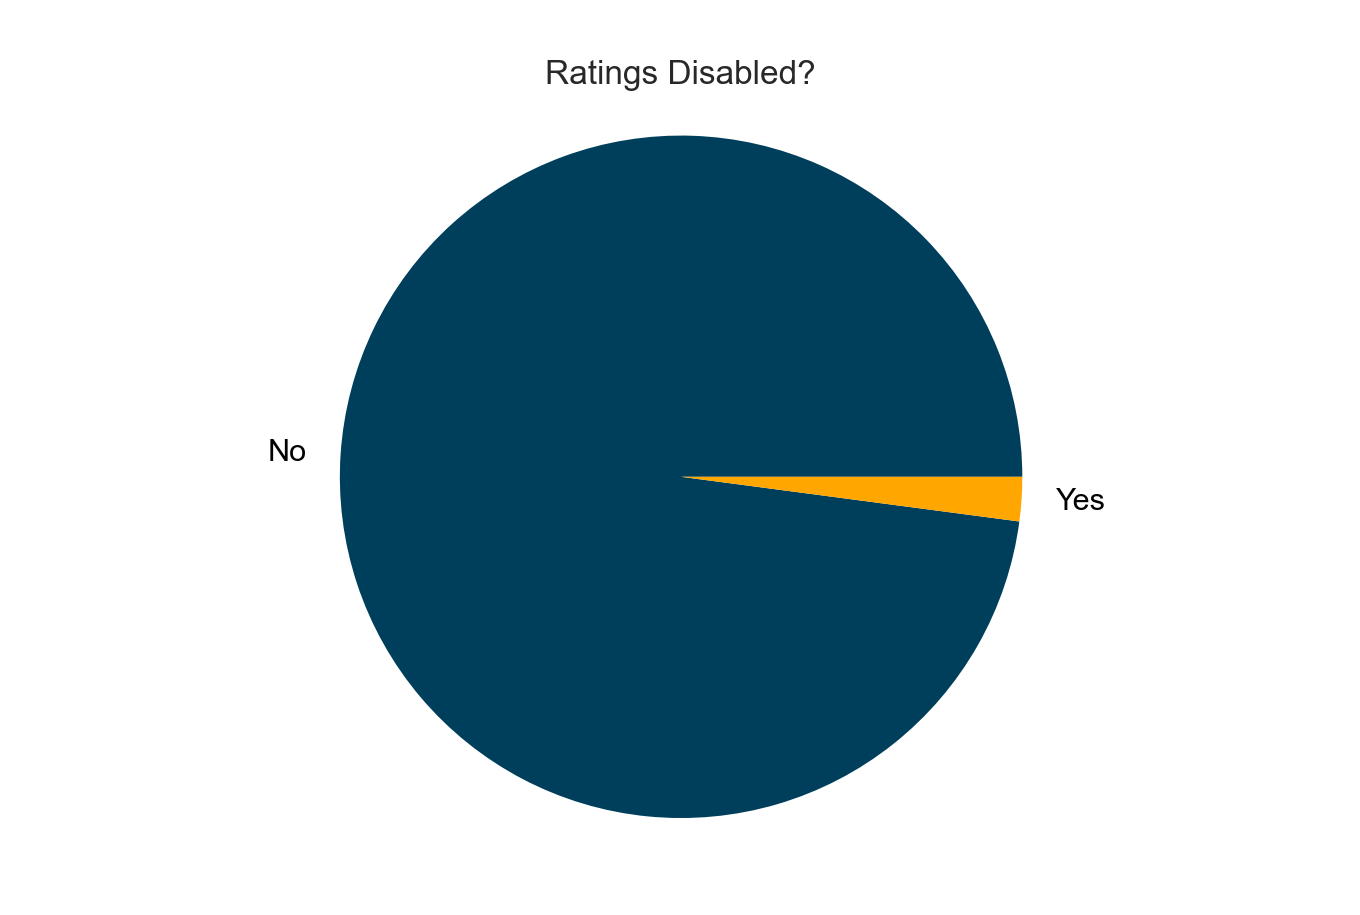

In [296]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
            colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')

In [297]:
df["ratings_disabled"].value_counts()

False    36571
True       781
Name: ratings_disabled, dtype: int64

<p>
    <font 
          style="font-size:12;"
          >We see that only 169 trending videos out of 40949 prevented users from commenting.
</p>

<h3>
    <font 
          style="font-size:20px;"
          color=#3367d6
          >How many videos have both comments and ratings disabled?
    </font>
</h3>

In [298]:
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

360

<p>
    <font 
          style="font-size:12;"
          >So there are just 106 trending videos that have both comments and ratings disabled
</p>

<h2>
    <font 
          style="font-size:30px;"
          color=#3367d6
          >Conclusions
    </font>
</h2>

<p>
    <font 
          style="font-size:12;"
          >Here are the some of the results we extracted from the analysis:<br>
                <ul>
                    <li>We analyzed a dataset that contains information about YouTube trending videos for 205 days. The dataset was collected in 2017 and 2018. It contains <b>40949</b> video entry.</li>
                    <li>71% of trending videos have less than 1.5 million views, and <b>91%</b> have less than <b>5</b> million views.</li>
                    <li>68% of trending videos have less than 40,000 likes, and <b>84%</b> have less than <b>100,000</b> likes.</li>
                    <li>67% of trending videos have less than 4,000 comments, and <b>93%</b> have less than <b>25,000</b> comments.</li>
                    <li>Some videos may appear on the trending videos list on more than one day. Our dataset contains 40494 entries but not for 40494 unique videos but for 6351unique videos.</li>
                    <li>Trending videos that have <b>100,000,000</b> views and more have title length between 33 and 55 characters approximately.</li>
                    <li>The delimiters - and | were common in trending video titles.</li>
                    <li>The words 'Official', 'Video', 'Trailer', 'How', and '2018' were common also in trending video titles.</li>
                    <li>There is a strong positive correlation between the number of views and the number of likes of trending videos: As one of them increases, the other increases, and vice versa.</li>
                    <li>There is a strong positive correlation also between the number of likes and the number of comments, and a slightly weaker one between the number of dislikes and the number of comments.</li>
                    <li>The category that has the largest number of trending videos is <b>'Entertainment'</b> with 9,964 videos, followed by 'Music' category with 6,472 videos, followed by 'Howto & Style' category with 4146 videos.</li>
                    <li>On the opposite side, the category that has the smallest number of trending videos is 'Shows' with 57 videos, followed by 'Nonprofits & Activisim' with 57 videos, followed by 'Autos & Vehicles' with 384 videos.</li>
    </font>
</p>